# INF2008 Machine Learning Project

## Sentiment Analysis on IMDB Movie Reviews



## Team Members

| Name| Student ID |
| ----------- | ----------- |
| Aishwarya Shri  | 2401690 |
| Tay Wei Lin | 2402961 |
| Tan Yu Xuan | 2400653 |
| Sidharth Vinod | 2400635 |
| Boo Wai Yee, Terry | 2402445 |
| Lim Bing Xian | 2401649 |



# Introduction

## Problem Statement
*   This project focuses on developing a sentiment analysis model that can automatically classify IMDB movie reviews as either positive or negative soley using information from the text itself

## Objective

*  Our goal is to build a machine learning model that can accurately predict the sentiment of any given movie review, enabling automated analysis of audience opinions without manual intervention

## Dataset Information


* We used the IMDB movie reviews dataset from kaggle which contains 50K movie reviews from the popular film database IMDB.It contains two rows, The user review of the film and their sentiment behind it (positive or negative).


[Dataset Link](https://www.kaggle.com/code/tarkkaanko/imdb-movie-review-sentiment-analysis/notebook)







## Connect Google Drive



In [8]:
# We saved the dataset in our google drive for easier use with Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import necessary libraries

In [ ]:
# Install all the relevant libraries
!pip install contractions
!pip install lxml_html_clean
!pip install py-readability-metrics
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.3 MB/s eta 0:00:00


In [ ]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import time
import warnings
import random
import re
import string
import contractions

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, words
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag

from textblob import TextBlob
from readability import Readability

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, silhouette_score
)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from hyperopt import fmin, tpe, Trials, hp, STATUS_OK, space_eval
from hyperopt.pyll.base import scope
from sklearn.model_selection import RandomizedSearchCV

from tqdm import tqdm



# Download required NLTK resources for matplotlib plots
nltk.download('stopwords') # Dpwnloads stopwords corpus
stop_words = set(stopwords.words('english')) # Load English stopwords set
nltk.download('punkt_tab') # Tokenizer for words and sentences
nltk.download('averaged_perceptron_tagger_eng') # POS tagger
nltk.download('wordnet') # WordNet lexical db from english lang for lemmatization
lemmatizer = WordNetLemmatizer() # To reduce words to root form

# Ignore warnings to keep output clean
warnings.filterwarnings('ignore')

# configurations for matplotlib plots
%config InlineBackend.figure_format = 'retina' # High-quality figure display

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Loading the Dataset


In [ ]:
#Read CSV file
moviereviews = pd.read_csv('/content/drive/MyDrive/ML_Project/IMDB Dataset.csv')
pd.options.display.max_colwidth = 1000 #max width  of displaying column of reviews

#Display first five rows of data
moviereviews.head()

review  \
0  One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the...   
1   A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.   
2                                                                           I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.   
3                                                                                                                                                                                                                                                             Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shot

## Exploratory Data Analysis (EDA) (Before Data Cleaning)

We performed EDA before cleaning to understand the raw structure of the data, identify potential issues like missing values, duplicates, or imbalanced sentiment distribution, and gain initial insights into word usage, review lengths, and sentiment trends. This helps us decide which cleaning steps are necessary (e.g., removing stopwords, punctuation, or fixing imbalances) and ensures we don’t accidentally remove useful information during preprocessing.

In [ ]:
# Shows the no. of rows and columns of the DataFrame
moviereviews.shape

(50000, 2)

In [ ]:
# Provides basic info of the DataFrame
moviereviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# Shows summary statistics for categorical columns (count, unique values, top value, and frequency)
moviereviews.describe()

review  \
count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      50000   
unique                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     49582   
top     Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.   
freq                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           5   

       sentiment  
count      50000  
unique         2  
top     positive  
freq       25000

In [ ]:
# Check for any duplicate values in the dataset
print(f"Total number of duplicates (Before): {moviereviews.duplicated().sum()}")

# Drop all the duplicates from the Dataframe
moviereviews.drop_duplicates(inplace=True)

print(f"Total number of duplicates (After): {moviereviews.duplicated().sum()}")

Total number of duplicates (Before): 418
Total number of duplicates (After): 0


#Pie Chart - Distribution of Sentiment

This pie chart represents the distribution of sentiment in the dataset, showing the proportion of positive and negative reviews. The blue section (50.2%) represents positive reviews, while the orange section (49.8%) represents negative reviews. The distribution is almost balanced, meaning there are nearly equal numbers of positive and negative reviews, which is beneficial for sentiment analysis as it prevents bias in model training.

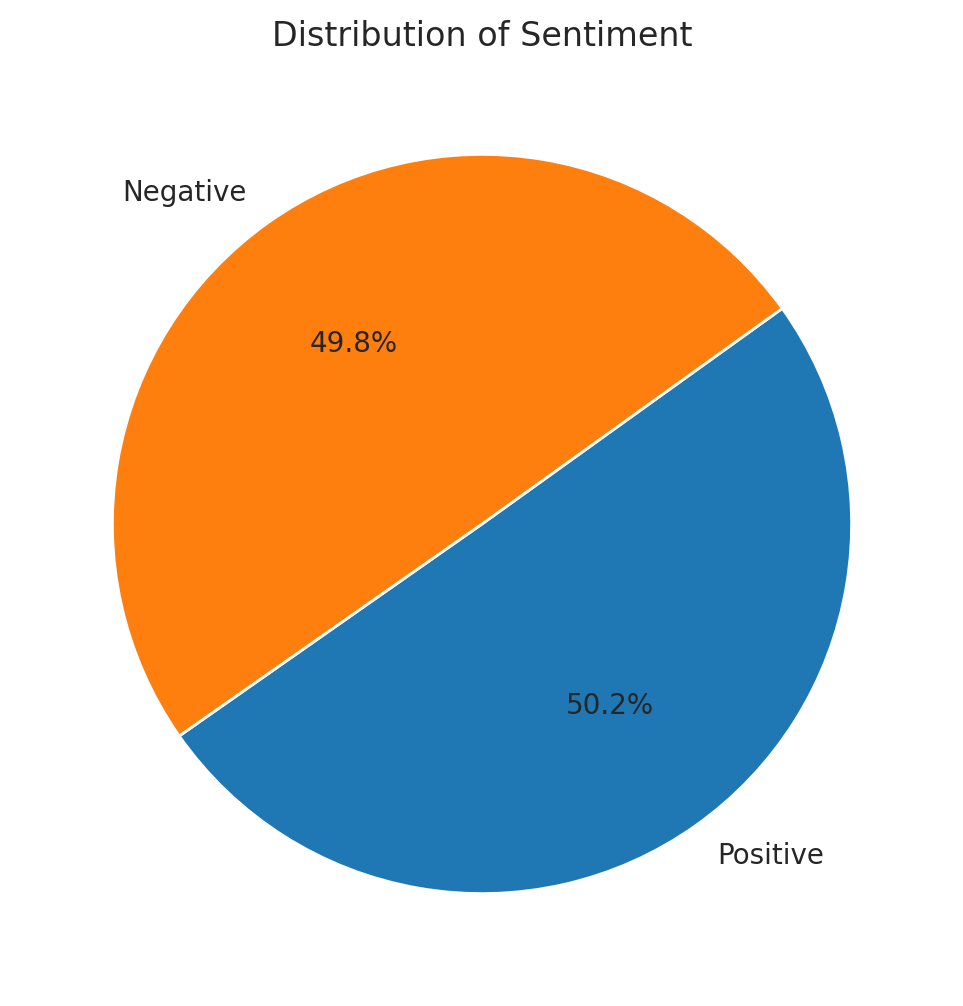

In [ ]:
sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(6,6)) # Set figure size for better visibility
plt.title("Distribution of Sentiment")

# Create a pie chart showing the distribution of positive and negative sentiment
plt.pie(moviereviews['sentiment'].value_counts(),
        labels = ['Positive','Negative'], # Labels for sentiment categories
        autopct='%1.1f%%',startangle=215) # Display percentages on the chart
plt.show()

In [ ]:
# Group the DataFrame by the 'sentiment' column & count the no. of occurrences for each sentiment category
moviereviews.groupby(['sentiment'])[['sentiment']].count()

sentiment
sentiment           
negative       24698
positive       24884

#WordCloud: Positive VS Negative Reviews
Word clouds are a text visualization technique that display words based on their frequency in a given dataset. The larger and bolder the word, the more frequently it appears in the dataset.

1. Positive Reviews: Common words in such as "movie," "film," "great," "love," "character," "time," and "make" appear larger, indicating that they frequently occur in reviews with a positive sentiment.

2. Negative Reviews: Words such as "movie," "film," "bad," "watch," "character," "look," "scene," and "people" appear frequently in negative reviews.

Identifying frequent words in positive and negative reviews can help in feature selection for sentiment analysis models. If certain words consistently appear in positive/negative reviews, they could be used as important predictors for a machine learning model.

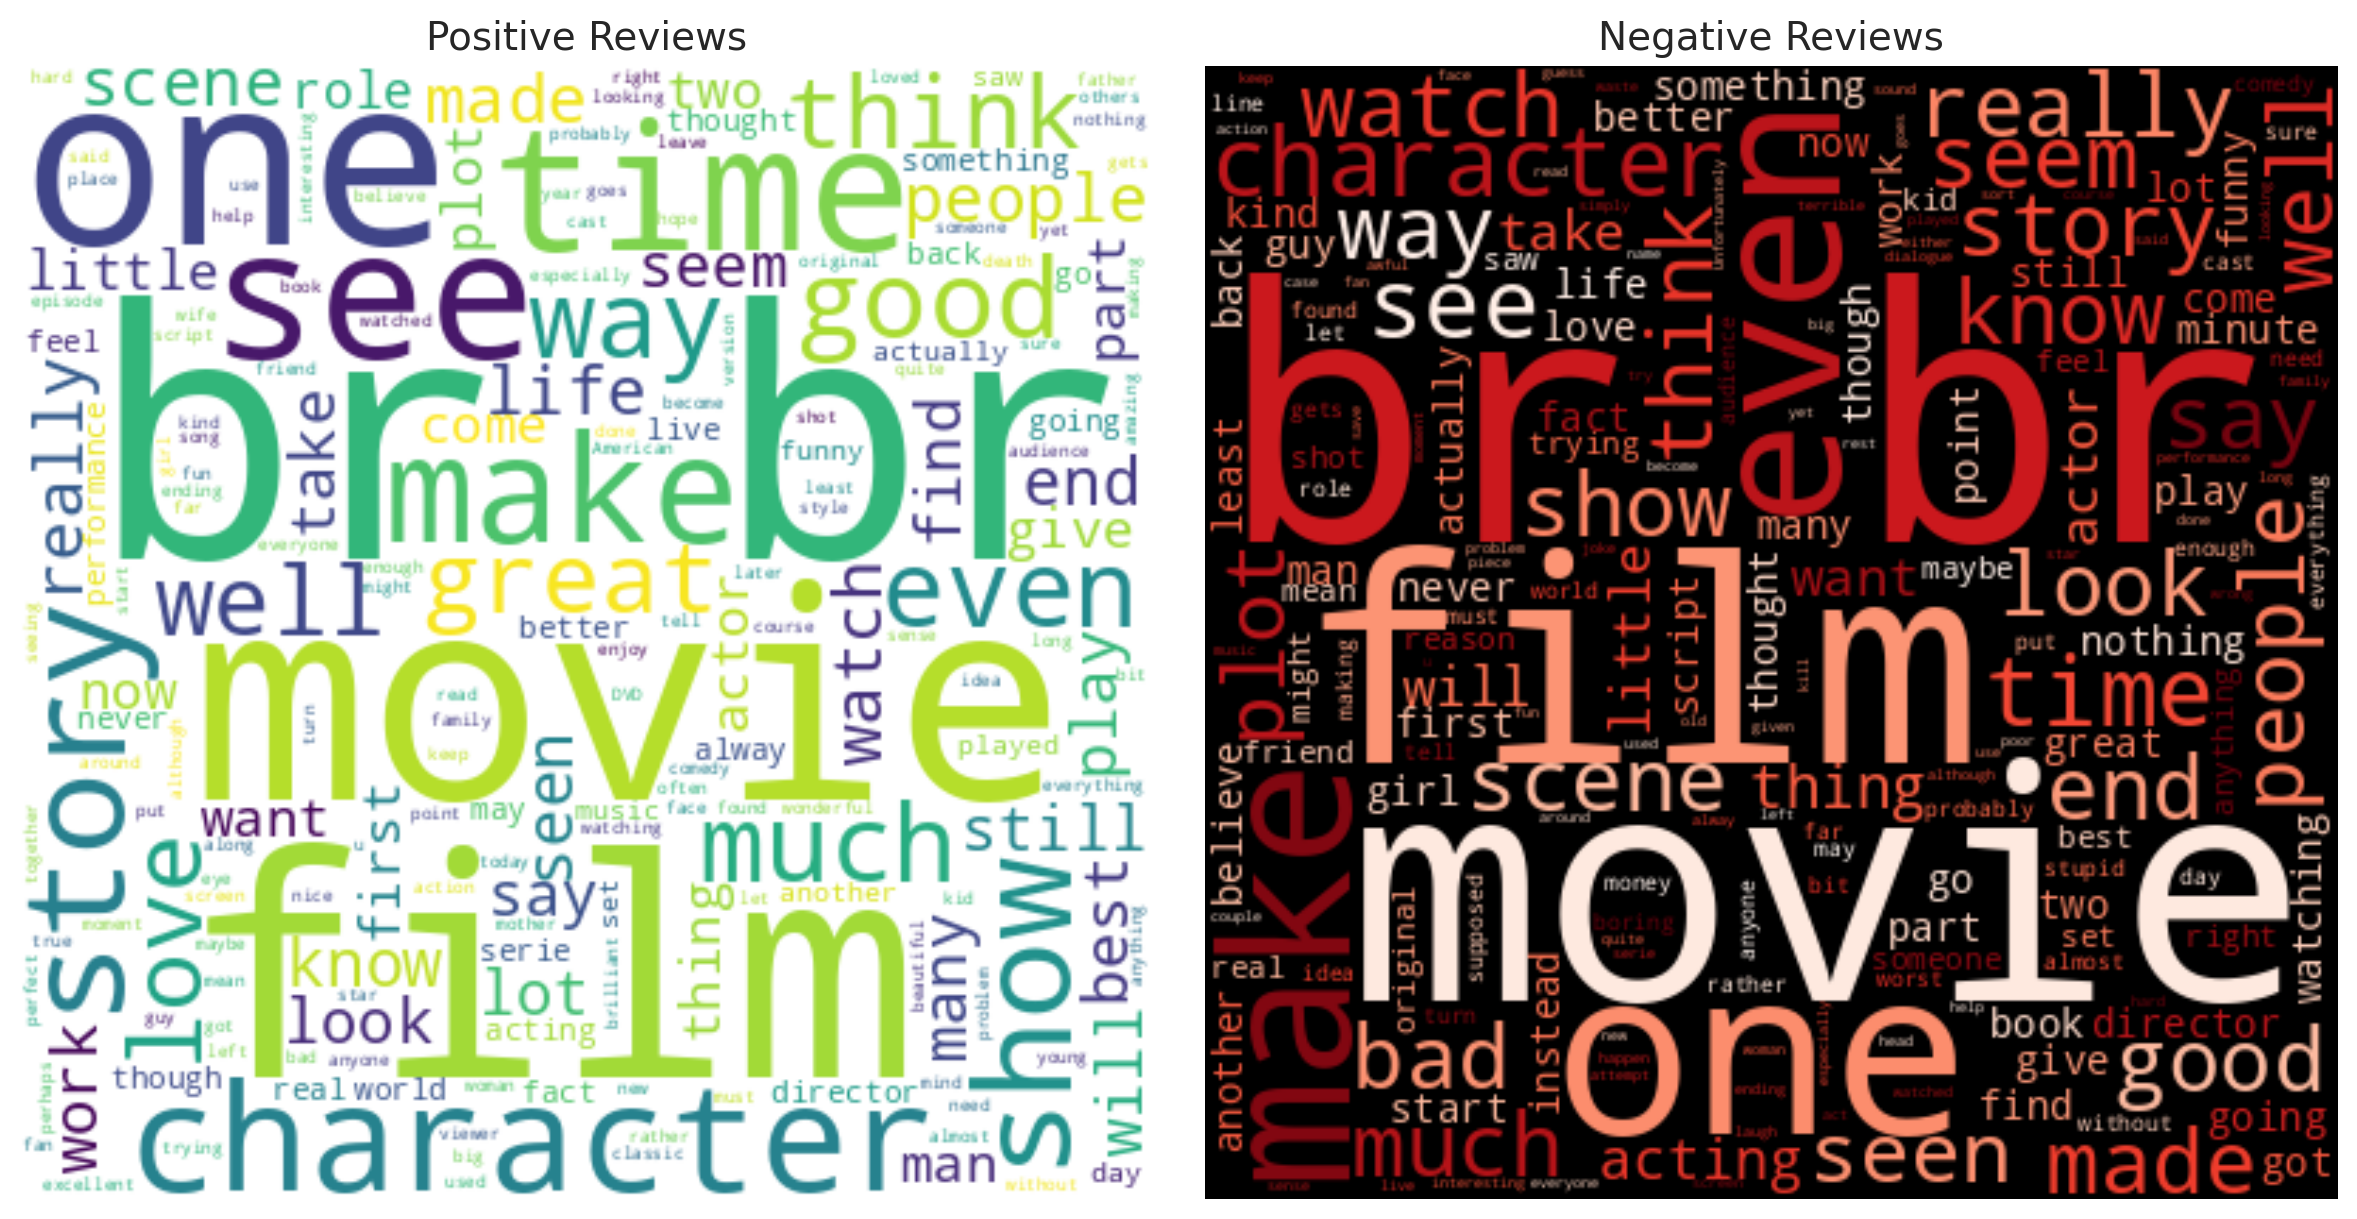

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all positive reviews into a single string
pos_text = " ".join(moviereviews[moviereviews['sentiment'] == 'positive']['review'])

# Combine all negative reviews into a single string
neg_text = " ".join(moviereviews[moviereviews['sentiment'] == 'negative']['review'])

# Set up the figure
plt.figure(figsize=(12, 6))

# Word Cloud for Positive Reviews
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=400, background_color='white').generate(pos_text), interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews", fontsize=14)

# Word Cloud for Negative Reviews
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=400, background_color='black', colormap="Reds").generate(neg_text), interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

#Histogram: Review Lengths for Positive & Negative Sentiments

1. X-Axis (Review Length - Word Count)
2. Y-Axis (Count - Number of reviews)
3. Color Representation: Green (Positive reviews) & Red (Negative Reviews): The overlap of colors indicates that both positive and negative reviews exist within the same length range

The majority of both positive and negative reviews are relatively short (fewer than 500 words).
A large number of shorter reviews (around 100 words) are positive, as seen by the higher green bar at the lower word count range.
As the review length increases, the frequency of reviews decreases, meaning that longer reviews are less common.
The distribution is right-skewed, meaning most reviews are short, and only a few are long.

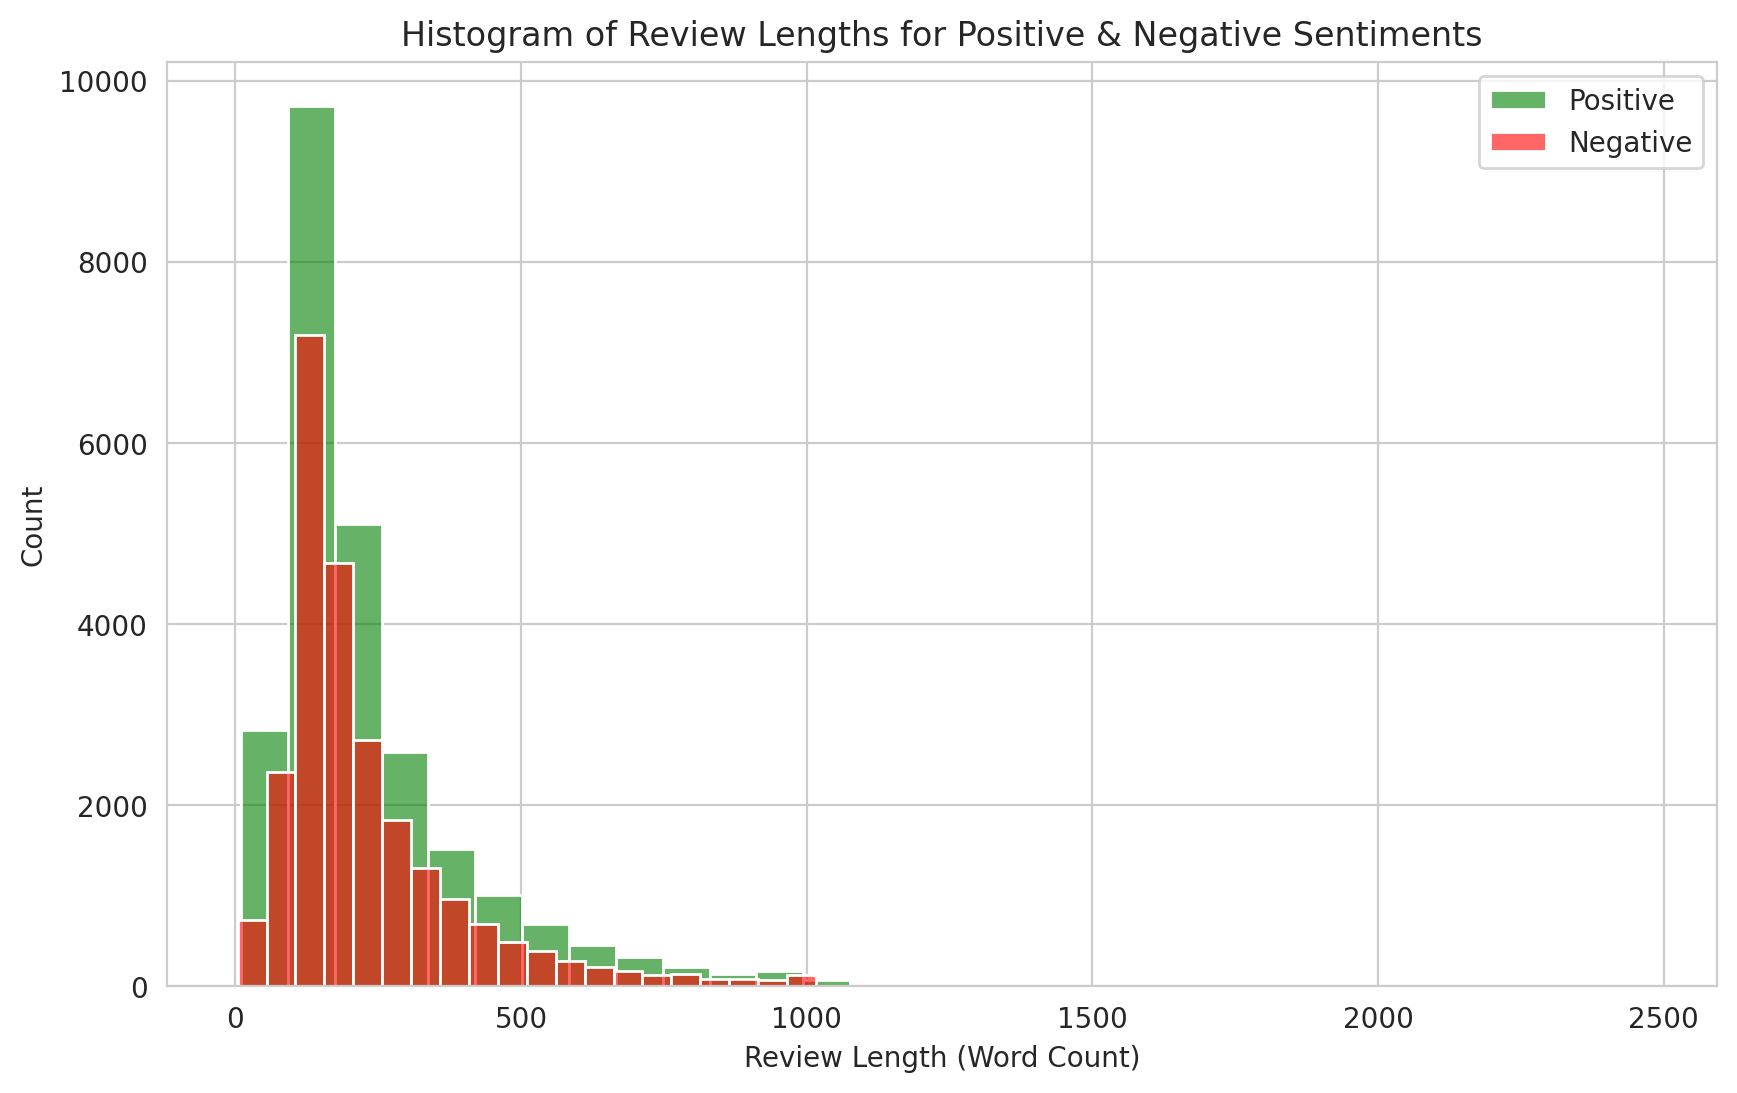

In [ ]:
# Create a new column 'review_length' to store the word count of each review
oviereviews['review_length'] = moviereviews['review'].apply(lambda x: len(x.split()))

# Set the figure size for better visualization
plt.figure(figsize=(10,6))

# Plot histogram for positive reviews
sns.histplot(moviereviews[moviereviews['sentiment'] == 'positive']['review_length'],
             bins=30, color='green', alpha=0.6, label='Positive')

# Plot histogram for negative reviews
sns.histplot(moviereviews[moviereviews['sentiment'] == 'negative']['review_length'],
             bins=30, color='red', alpha=0.6, label='Negative')

plt.legend() # To distinguish positive and negative reviews

# Set title and labels for better readability
plt.title('Histogram of Review Lengths for Positive & Negative Sentiments')
plt.xlabel('Review Length (Word Count)')
plt.ylabel('Count')
plt.show()

#Identifying Sentiment patterns in Reviews

This step extracts the first and last words from each review and stores them in new columns (first_word and last_word). Analyzing these words can provide insights into how reviews begin and end, which may reveal patterns in positive vs negative sentiment expressions. For example, negative reviews might frequently start with words like "This", "After", or "Death", indicating criticism or dissatisfaction, while positive reviews might begin with "Having", "I", or "This", suggesting a more descriptive or personal tone. Similarly, last words like "missed", "it!", "death", and "film!" show how sentiment is reflected in closing statements. This type of EDA helps in identifying textual trends that could improve sentiment classification models.

In [ ]:
# Extract the first word from each review and store it in a new column 'first_word'
moviereviews['first_word'] = moviereviews['review'].apply(lambda x: str(x).split()[0])

# Extract the last word from each review and store it in a new column 'last_word'
moviereviews['last_word'] = moviereviews['review'].apply(lambda x: str(x).split()[-1])

# Display a random sample of 10 rows showing the first word, last word, and sentiment
print(moviereviews[['first_word', 'last_word', 'sentiment']].sample(10))

      first_word last_word sentiment
33008      After     miss.  negative
34662       This  acting!"  negative
8641           I      9/10  positive
37231     Having   missed.  positive
2257        This    Grant.  negative
21374        One       it!  positive
9318          It  instead.  negative
1746       There    death.  negative
3049        This      :=8)  negative
34406       This     film!  positive


# Feature Extraction

Since the problem is a classification problem, our independent variable is the movie reviews itself. However we feel that there might be more features inside the review itself that can be used to train our model.


| Possible Features | How it can affect sentiment? |
| ----------- | ----------- |
| Word Count | Short reviews tend to be extreme, while long ones give stronger opinions.
 |
| Sentence Count | More sentences often mean stronger opinions |
| Exclamation **(!)** Count | More exclamations usually mean strong positive or strong negative emotion. |
| Question **(?)** Count | Can hint at negative sentiment |
| Ellipsis **(...)** Count | Often signals negative sentiment |
| Count of Adjective and Adverbs | More descriptive words amplify positive or negative sentiment. |
| Negation Count | High negation use often means negative sentiment (e.g., "not good", "never again"). |


We will first extract the possible features before cleaning the data



In [ ]:
import nltk
import re
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from readability import Readability

# Count the number of words
def word_count(text):
    words = word_tokenize(text)
    return len(words)

# Count the number of sentences
def sentence_count(text):
    sentences = sent_tokenize(text)
    return len(sentences)

# Count the number of exclamation point
def exclamation_count(text):
    return text.count('!')


# Count the number of question marks
def question_count(text):
    return text.count('?')


# Count the number of ellipsis and handle the different ellipsis cases (. . . and ...)
def ellipsis_count(text):
    return len(re.findall(r"\.\.\.|…", text))


# Compute the ratio of words written in all capital letters
def capital_word_ratio(text):
    words = word_tokenize(text)
    capital_words = [word for word in words if word.isupper() and len(word) > 1]  # Exclude single-char words
    return len(capital_words) / len(words) if words else 0 # Return ratio, avoid division by zero

# Count the number of adjectives and adverbs in a text
def count_adjectives_adverbs(text):
    tokens = nltk.word_tokenize(text) # Tokenize the text
    pos_tags = nltk.pos_tag(tokens) # Get part-of-speech (POS) tags

    # Using the Penn Treebank Standard
    # Adjective (JJ, JJR, JJS) & Adverb (RB, RBR, RBS) tags
    adjective_tags = {"JJ", "JJR", "JJS"}
    adverb_tags = {"RB", "RBR", "RBS"}

    # Count adjectives and adverbs seperately
    adjective_count = sum(1 for _, tag in pos_tags if tag in adjective_tags)
    adverb_count = sum(1 for _, tag in pos_tags if tag in adverb_tags)

    return adjective_count + adverb_count  # Return total count

# Compute the readability score using the Flesch-Kincaid formula
def readability_score(text):
    r = Readability(text) # Initialize Readability analysis
    try:
        return r.flesch_kincaid().score
    except:
        return 0  # Handle cases where the text is too short or causes an error

# Count the number of negation words in a text
def negation_count(text):
    # List of common negation words and contractions
    negations = {
    "not", "never", "no", "none", "nothing", "nowhere", "neither", "nor", "hardly", "scarcely", "barely",
    "n't", "cannot", "can't", "won't", "don't", "isn't", "wasn't", "aren't", "weren't",
    "hasn't", "haven't", "hadn't", "doesn't", "didn't", "shouldn't", "wouldn't",
    "couldn't", "mustn't", "mightn't", "shan't", "ain't", "without", "lacking", "fail to", "unable to"
    }
    words = word_tokenize(text.lower()) # Tokenize and convert to lowercase
    return sum(1 for word in words if word in negations) # Count negation words

# Apply the defined functions to each review in the DataFrame and store results in new columns

# Compute readability score for each review
moviereviews["readability_score"] = moviereviews["review"].apply(readability_score)

# Compute word count for each review
moviereviews["word_count"] = moviereviews["review"].apply(word_count)

# Compute sentence count for each review
moviereviews["sentence_count"] = moviereviews["review"].apply(sentence_count)

# Count exclamation marks in each review
moviereviews["exclamation_count"] = moviereviews["review"].apply(exclamation_count)

# Count question marks in each review
moviereviews["question_count"] = moviereviews["review"].apply(question_count)

# Count ellipses in each review
moviereviews["ellipsis_count"] = moviereviews["review"].apply(ellipsis_count)

# Compute the ratio of capitalized words in each review
moviereviews["capital_word_ratio"] = moviereviews["review"].apply(capital_word_ratio)

# Count adjectives and adverbs in each review
moviereviews["count_adjectives_adverbs"] = moviereviews["review"].apply(count_adjectives_adverbs)

# Count negation words in each review
moviereviews["negation_count"] = moviereviews["review"].apply(negation_count)


# Data Cleaning using NLP (Natural Language Processing)

Currently, the review data in our dataset is unclean, which can negatively impact our model’s ability to accurately predict sentiment. To ensure consistent and reliable performance, we need to preprocess the text before training. This includes removing noise, standardizing formatting to make the input more suitable for machine learning models.

To help us we will use the we will use the **NLTK** (Natural Language Toolkit), a powerful Python library for natural language processing (NLP). This will allow us to efficiently **tokenize text**, **remove stopwords**, **normalize words**(lemmatization/stemming)


What the data cleaning will do
- remove numbers
- remove punctuation
- change to lowercase
- remove stopwords (custom also)
- tokenization
- lemmatization



In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


# We try not running because this code takes a long time
def clean_text(content):
    # Expand contractions like "don't" -> "do not"
    content = contractions.fix(content)

    # Remove HTML tags (handles full tags like <br> and broken tags like < br >)
    content = re.sub(r'<.*?>', ' ', content)

    # Lowercase everything
    content = content.lower()

    # Remove numbers
    content = re.sub(r'\d+', '', content)

    # Remove all punctuation (including weird symbols)
    content = re.sub(r'[^\w\s]', ' ', content)

    # Remove extra spaces (caused by all that cleaning)
    content = re.sub(r'\s+', ' ', content).strip()

    # Load stopwords and add custom stopwords like 'br'
    stop_words = set(stopwords.words('english'))
    custom_stop_words = ['br']  # <br> becomes br after HTML removal
    stop_words.update(custom_stop_words)

    # Tokenize and remove stopwords
    words = word_tokenize(content)
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1]

    # Lemmatize (bring words to root form)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word, tag in pos_tag(filtered_words):
        pos = tag[0].lower() if tag[0].lower() in ['a', 'n', 'v', 'r'] else 'n'
        lemmatized_words.append(lemmatizer.lemmatize(word, pos))

    # Join back into one string
    content = ' '.join(lemmatized_words)

    return content

# Read and clean the data
moviereviews['review'] = moviereviews['review'].astype(str)
moviereviews['sentiment'] = moviereviews['sentiment'].astype(str)

# Apply cleaning to all reviews
moviereviews['review'] = moviereviews['review'].apply(clean_text)


# Show full text (no truncation)
pd.set_option('display.max_colwidth', None)

# Check sample
moviereviews.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Feature Selection

Feature selection is a crucial step in building a robust sentiment analysis model as it helps in identifying the most relevant and informative features while eliminating redundant or noisy data. In our research, we explored various features and found that TextBlob, a powerful NLP library, provides useful metrics such as Polarity and Subjectivity, which can enhance our sentiment classification.


---



Polarity measures the sentiment intensity of a text on a scale from -1 (very negative) to +1 (very positive). This helps in distinguishing strongly negative, neutral, and highly positive reviews.

Subjectivity scores the text from 0 (objective, fact-based) to 1 (subjective, opinion-based), allowing us to determine if a review contains personal opinions or factual statements.


| Function | Purpose | Effects on Sentiment
| ----------- | ----------- |-----------|
Polarity |	Scores text from -1 to 1 |	-1 = Very Negative, 1 = Very Positive
Subjectivity |	Scores text from 0 to 1 |	0 = Objective (Fact-based), 1 = Subjective (Opinion-based)




By incorporating both Polarity and Subjectivity as key features, we aim to improve our model’s ability to classify reviews effectively, ensuring it captures not only sentiment strength but also the degree of opinion vs factual content.










In [ ]:
# Function to calculate the polarity of a given text
# Polarity ranges from -1 (negative) to 1 (positive), with 0 being neutral
def get_polarity(text):
    return TextBlob(text).sentiment.polarity  # Extract sentiment polarity using TextBlob

# Function to calculate the subjectivity of a given text
# Subjectivity ranges from 0 (objective) to 1 (subjective)
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity  # Extract sentiment subjectivity using TextBlob

# Apply the polarity function to the 'review' column and store results in a new column 'polarity'
moviereviews['polarity'] = moviereviews.apply(lambda x: get_polarity(x['review']), axis=1)

# Apply the subjectivity function to the 'review' column and store results in a new column 'subjectivity'
moviereviews['subjectivity'] = moviereviews['review'].apply(get_subjectivity)

In [ ]:
moviereviews

review  \
0      one reviewer mention watch oz episode hook right exactly happen first thing strike oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home many aryan muslim gangstas latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show would dare forget pretty picture paint mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watch developed taste oz get accustomed high level graphic violence violence injustice crook guard sell nickel inmate kill order get away well mannered middle class inmate turn prison bitch due lack street skill prison experience watch oz may become comfortable uncomfortable view get touch darker side   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                     wonderful little production film technique unassuming old time bbc fashion give comfort sometimes discomforting sense realism entire piece actor extremely well choose michael sheen get polari voice pat truly see seamless edit guided reference williams diary entry well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remain solid disappears play knowledge sens particularly scene concern orton halliwell set particularly flat halliwell mural decorate every surface terribly well do   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              think wonderful way spend time hot summer weekend sit air condition theater watch light hearted comedy plot simplistic dialogue witty character likable even well bread suspect serial killer may disappoint realize match point risk addiction think proof woody allen still fully control style many u grown love would laugh one woody comedies year dare say decade never impress scarlet johanson manage tone sexy image jump right average spirit young woman may crown jewel career wittier devil wear prada interest superman great comedy go see friend   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      basically family little boy jake think zombie closet parent fight time movie slower soap opera suddenly jake decides become rambo kill zombie ok first go make film mu

In [ ]:
print(moviereviews.columns) #Current columns in moviereviews dataset after data cleaning and feature selection


Index(['review', 'sentiment', 'review_length', 'first_word', 'last_word',
       'readability_score', 'word_count', 'sentence_count',
       'exclamation_count', 'question_count', 'ellipsis_count',
       'capital_word_ratio', 'count_adjectives_adverbs', 'negation_count',
       'polarity', 'subjectivity'],
      dtype='object')


In [ ]:
# Saving the final cleaned dataset for faster training purposes
moviereviews.to_csv('/content/drive/MyDrive/ML_Project/final_data.csv')

## We decided to use the Mutual Information technique
Selected **top 3 features** to train our model with:

---

*   Captures both Linear and Non Linear Relationships
  *   Unlike other feature selection methods such as correlation, mutual information can identify complex relationships between the feature and target
*  It works well with categorical targets
  *   Since our target variable is categorical (positive/negative), ordinary correlation metrics such as Pearsons wont work well with it





In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode the target variable (if it's categorical)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(moviereviews["sentiment"])

# Drop non-numeric columns (ensure X contains only features)
X = moviereviews.drop(columns=["sentiment", "review"], errors="ignore")


# Check feature columns and data size
print("Feature columns:", list(X.columns))
print("Number of samples:", len(moviereviews))

# Select the top k features
k = 3
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X, y_encoded)

# Get selected feature indices and names
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

# Display selected features
print(f"\n🔹 Selected Top {k} Features:")
for feat in selected_features:
    print(f"  ✅ {feat}")

# Create a DataFrame for better visualization of F-scores & p-values
feature_scores_df = pd.DataFrame({
    "Feature": X.columns,
    "Mutual Information Score": selector.scores_
}).sort_values(by="Mutual Information Score", ascending=False)

# Display structured feature selection results

feature_scores_df

Feature columns: ['readability_score', 'word_count', 'sentence_count', 'exclamation_count', 'question_count', 'ellipsis_count', 'capital_word_ratio', 'count_adjectives_adverbs', 'negation_count', 'polarity', 'subjectivity']
Number of samples: 49582

🔹 Selected Top 3 Features:
  ✅ question_count
  ✅ negation_count
  ✅ polarity


Feature  Mutual Information Score
9                   polarity                  0.186833
8             negation_count                  0.022245
4             question_count                  0.020776
0          readability_score                  0.003134
7   count_adjectives_adverbs                  0.002334
10              subjectivity                  0.001824
5             ellipsis_count                  0.001800
2             sentence_count                  0.001730
6         capital_word_ratio                  0.001702
3          exclamation_count                  0.001139
1                 word_count                  0.000506

#Data Visualisations
(after Data Cleaning & Feature Selection)

Now lets visualise some more information about the new features


#WordCloud: Positive VS Negative Reviews
The word cloud visualization presents the most frequently occurring words in positive and negative reviews after text cleaning and feature selection.

Left (Positive Reviews): The word cloud highlights words like "see", "story", "character", "great", "time", "feel", and "love", indicating that positive reviews often focus on engaging storylines, strong character development, and enjoyable experiences. The color-coded size of the words suggests their frequency in the dataset.

Right (Negative Reviews): This word cloud shows frequent words such as "movie", "see", "film", "even", "make", "bad", and "director", suggesting that negative reviews may focus on disappointments related to the storyline, directing, or overall execution.

This analysis is valuable because it provides insight into how sentiment is expressed linguistically in reviews. The text cleaning process has removed stopwords, special characters, and irrelevant words, ensuring that only meaningful content remains. These word frequencies can also serve as features for sentiment classification models.

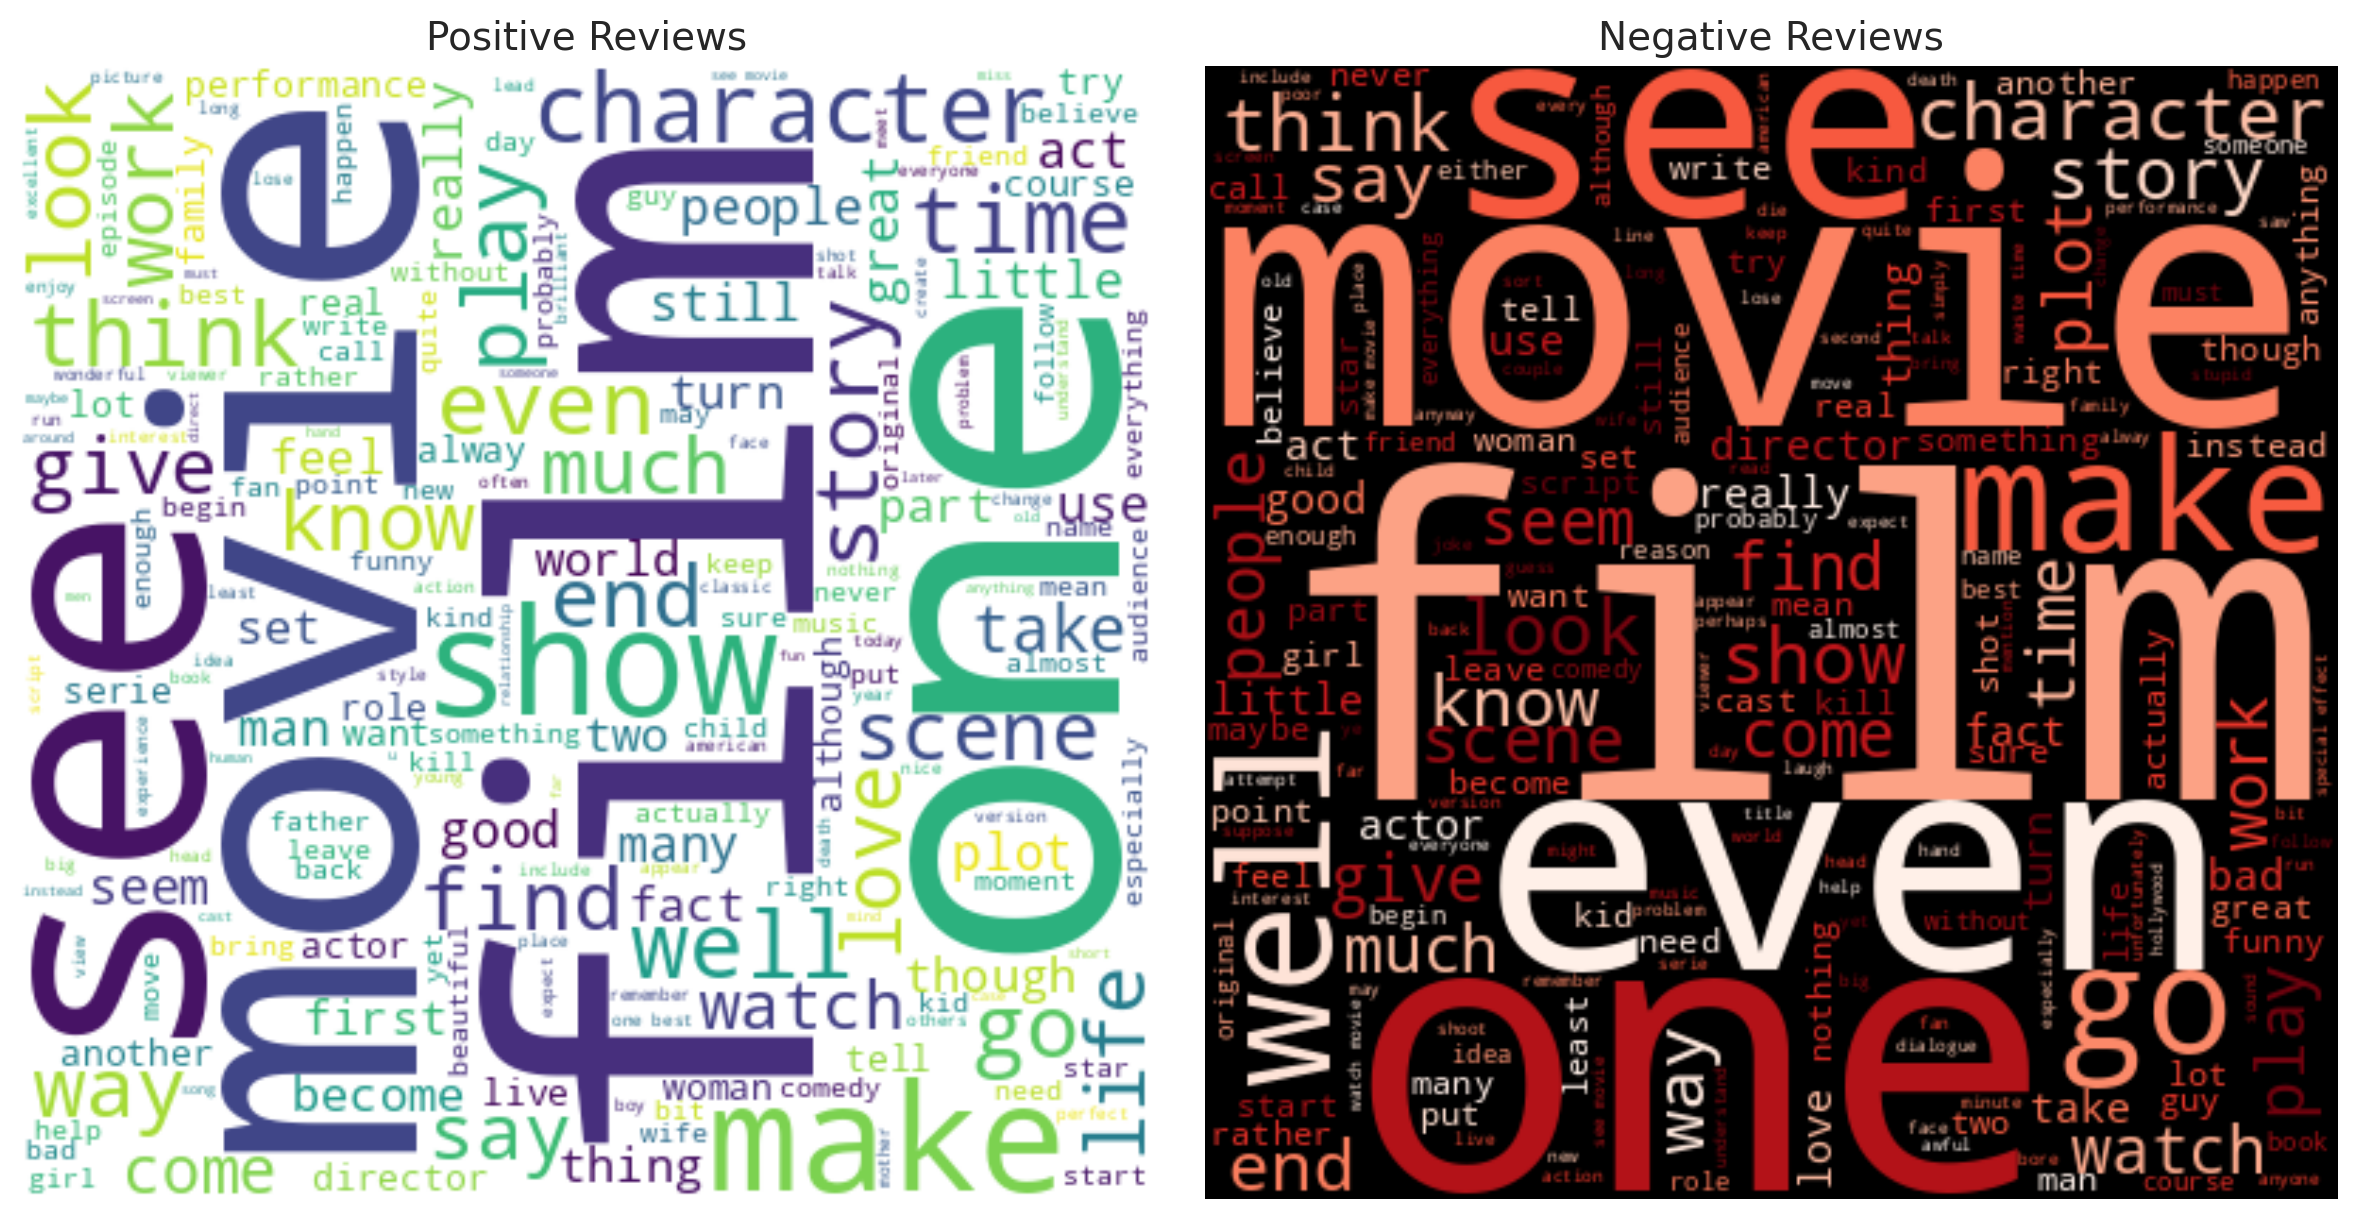

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all positive reviews into a single string
pos_text = " ".join(moviereviews[moviereviews['sentiment'] == 'positive']['review'])

# Combine all negative reviews into a single string
neg_text = " ".join(moviereviews[moviereviews['sentiment'] == 'negative']['review'])

# Set up the figure
plt.figure(figsize=(12, 6))

# Word Cloud for Positive Reviews
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=400, background_color='white').generate(pos_text), interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews", fontsize=14)

# Word Cloud for Negative Reviews
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=400, background_color='black', colormap="Reds").generate(neg_text), interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


#Scatter Plot: Relationship Between Polarity and Subjectivity in Movie Reviews
This scatter plot visualizes the relationship between polarity (sentiment strength) and subjectivity (degree of opinion) in movie reviews. Polarity ranges from -1 (very negative) to +1 (very positive), while subjectivity ranges from 0 (objective/factual) to 1 (subjective/opinion-based). The blue dots represent positive reviews, while the orange dots indicate negative reviews.

The distribution shows that highly subjective reviews tend to have stronger positive or negative polarity, meaning that opinion-based reviews are more emotionally charged. In contrast, reviews closer to 0 on the subjectivity scale (more factual) have polarity scores that are more neutral. This analysis helps understand how opinionated reviews correlate with their sentiment intensity, which can be useful for refining sentiment classification models.

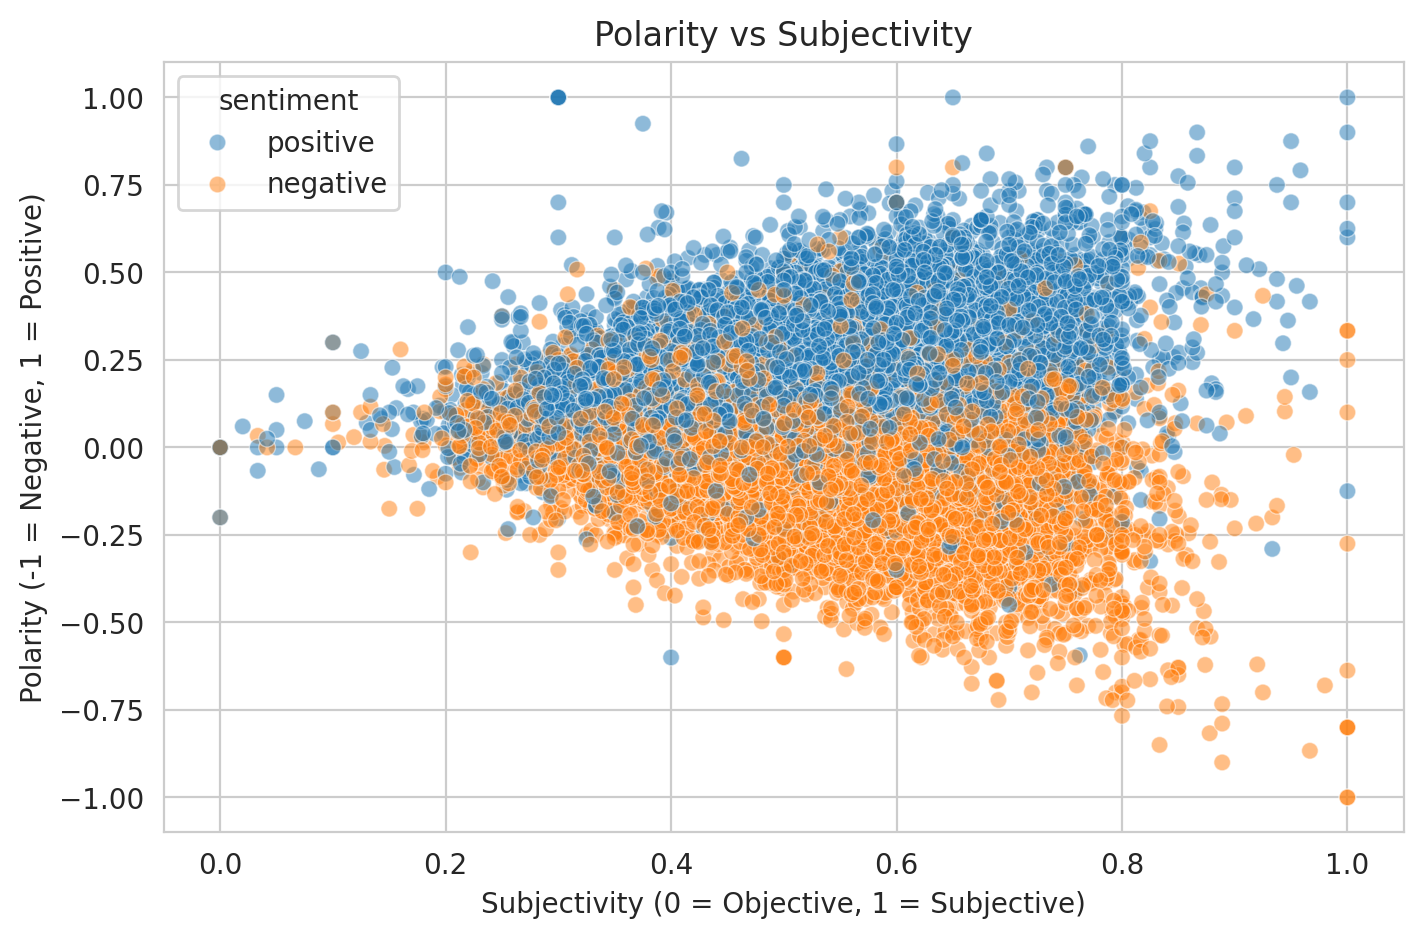

In [ ]:
# Set the figure size for better visualization
plt.figure(figsize=(8,5))

# Create a scatter plot to visualize the relationship between subjectivity and polarity
sns.scatterplot(x='subjectivity', y='polarity', hue='sentiment', data=moviereviews, alpha=0.5)
plt.title('Polarity vs Subjectivity')
plt.xlabel('Subjectivity (0 = Objective, 1 = Subjective)')
plt.ylabel('Polarity (-1 = Negative, 1 = Positive)')
plt.show()


#Box Plot: Exclamation Marks Usage by Sentiment
This box plot visualizes the distribution of exclamation mark usage in positive and negative reviews. The Y-axis represents the count of exclamation marks in each review, while the X-axis represents the sentiment category (positive or negative).

From the plot, we observe that while most reviews contain few or no exclamation marks, there are several outliers with a high number of exclamation marks. These outliers indicate that some users express strong emotions or emphasis, which is common in both highly positive and highly negative reviews. However, the presence of extreme values suggests that negative reviews may have more instances of excessive punctuation, possibly due to frustration or exaggeration. This insight can help in analyzing sentiment intensity and refining text-based sentiment classification models.

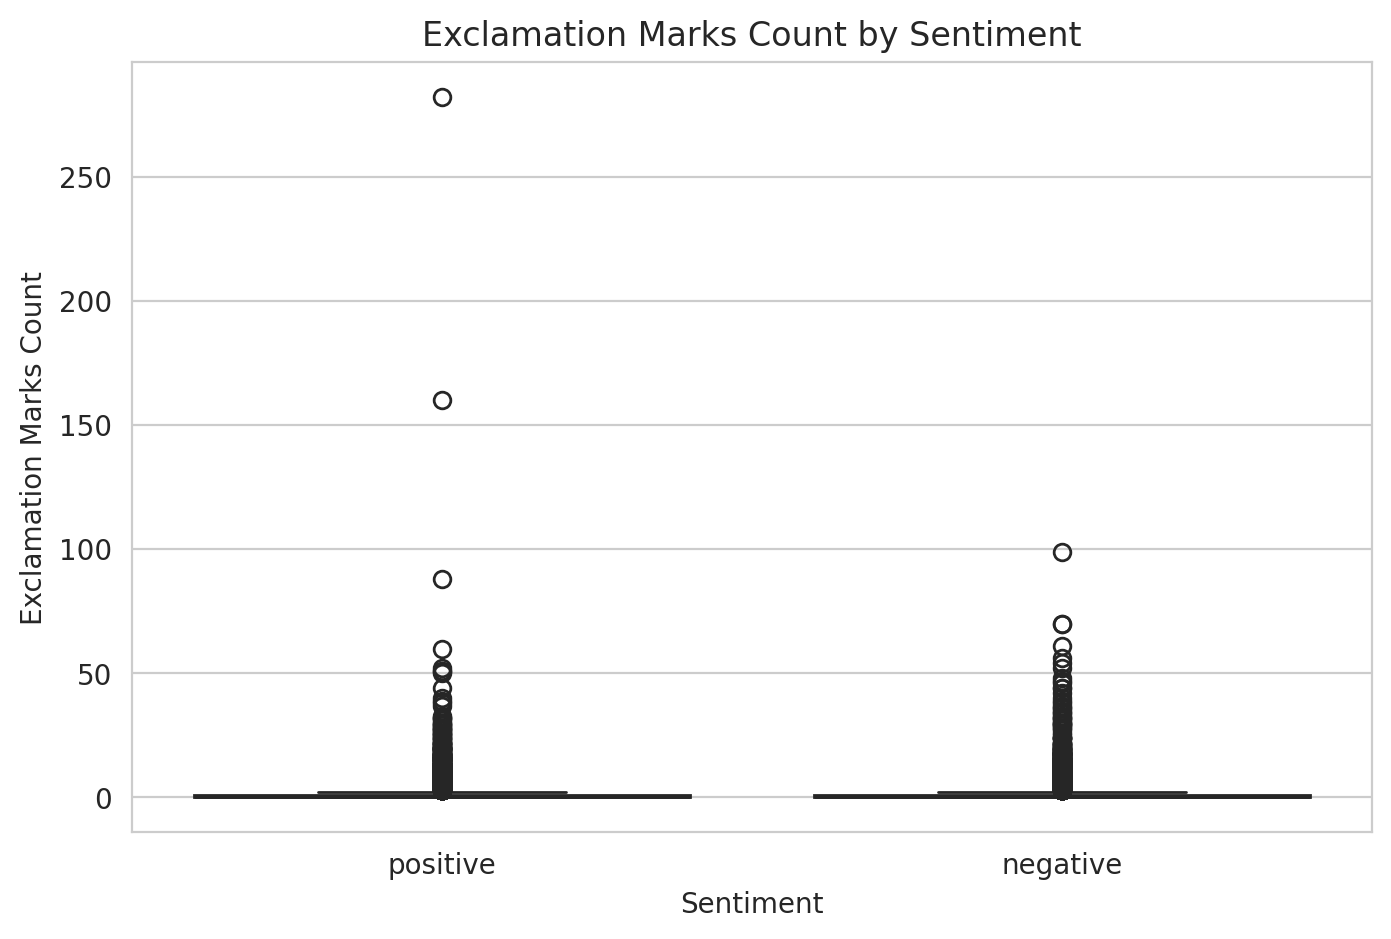

In [ ]:
# Set the figure size for better visualization
plt.figure(figsize=(8,5))

# Create a box plot to analyze the distribution of exclamation marks across sentiment categories
sns.boxplot(x='sentiment', y='exclamation_count', data=moviereviews, palette=['red', 'green'])
plt.title('Exclamation Marks Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Exclamation Marks Count')
plt.show()

# Model Building


Now that we have selected our features we will train some models on our dataset. We decided to use the below models for this project:

| Function
| -----------
LogisticRegression
Random Forest Classifier
Decision Tree Classifier
XGBoost Classifier
AdaBoost Classifier
Linear Support Vector Classifier (LinearSVC)
Light Gradient-Boosting Machine (LightGBM)



---


## We have also introduced a few more techniques to make our model more optimised and efficient



*   Stratified K-Fold Cross Validation
  *  Ensures a balanced class distribution in each fold, leading to a more reliable evaluation and better generalization.

*   TF-IDF
  * Allow us to measure the importance of a word to its document relative to other documents. It allows us to identify important words while reducing the impact of commonly occurring words that provide little meaning. It will convert our text reviews into usable feature vectors that can help train the model





In [ ]:
# 1. Load your dataset
df = pd.read_csv("/content/drive/MyDrive/ML_Project/final_data.csv")

# Keep only relevant features
df = df[['review', 'polarity', 'question_count', 'negation_count', 'sentiment']]

# 2. Convert sentiment to numeric labels
label_encoder = LabelEncoder()
df['sentiment_label'] = label_encoder.fit_transform(df['sentiment'])

# 3. Define features (X) and target (y)
X = df[['review', 'polarity', 'question_count', 'negation_count']]
y = df['sentiment_label']

# 4. Split data into train and test sets into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 5. Build a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'review'),
        ('num', StandardScaler(), ['polarity', 'question_count', 'negation_count'])
    ])

# 6. Define the models to evaluate
models = [
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('XGB Classifier', XGBClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('LinearSVC', LinearSVC(random_state=42)),
    ('LGBMClassifier', lgb.LGBMClassifier(random_state=42, n_jobs=-1))
]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_summary = []  # Store results for all models

for name, model in models:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('clf', model)
    ])

    # Perform cross-validation
    cv_results = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=skf,
        scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
    )

    # Compute mean scores
    acc  = np.mean(cv_results['test_accuracy'])
    f1   = np.mean(cv_results['test_f1_weighted'])
    prec = np.mean(cv_results['test_precision_weighted'])
    rec  = np.mean(cv_results['test_recall_weighted'])

    # Store results in a list
    cv_summary.append({
        "Model": name,
        "CV Accuracy": acc,
        "CV F1 Score": f1,
        "CV Precision": prec,
        "CV Recall": rec
    })

# 8. Convert the results to a DataFrame and display them
df_cv_results = pd.DataFrame(cv_summary)

In [ ]:
print("Cross-Validation Results:")
df_cv_results

Cross-Validation Results:


Model  CV Accuracy  CV F1 Score  CV Precision  CV Recall
0  LogisticRegression     0.886146     0.886121      0.886414   0.886146
1       Random Forest     0.852212     0.852211      0.852233   0.852212
2       Decision Tree     0.730795     0.730784      0.730840   0.730795
3      XGB Classifier     0.850523     0.850487      0.850773   0.850523
4            AdaBoost     0.777209     0.776970      0.778212   0.777209
5           LinearSVC     0.892827     0.892813      0.892978   0.892827
6      LGBMClassifier     0.856801     0.856761      0.857102   0.856801

Based on the training results, It can be seen that LinearSVC performed the best with

| Name| CV Accuracy	| CV F1 Score	|CV Precision|	CV Recall
| ----------- | ----------- | ----------- | ----------- | ----------- |
|  LinearSVC  | 0.892827	| 0.892813	|0.892978	|0.892827 |


Next lets look at its performance on the test dataset

In [ ]:
# We will choose LinearSVC as it performed the best on the validation set now lets predict it on the testing data

svc = LinearSVC(random_state=42)

# Create a pipeline that first applies preprocessing and then fits the SVC model
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', svc)
])

# Train the model using the training dataset
svc_pipeline.fit(X_train, y_train)


# Make predictions on the test dataset
svc_pred = svc_pipeline.predict(X_test)

# Calculate the accuracy of the model on the test dataset
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))


Test accuracy: 89.49%


In [ ]:
# Compute the confusion matrix to evaluate the classification performance
cm = confusion_matrix(y_test, svc_pred)

print(cm)
print("\n")
print(classification_report(y_test, svc_pred))

[[4375  565]
 [ 477 4500]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4940
           1       0.89      0.90      0.90      4977

    accuracy                           0.89      9917
   macro avg       0.90      0.89      0.89      9917
weighted avg       0.90      0.89      0.89      9917



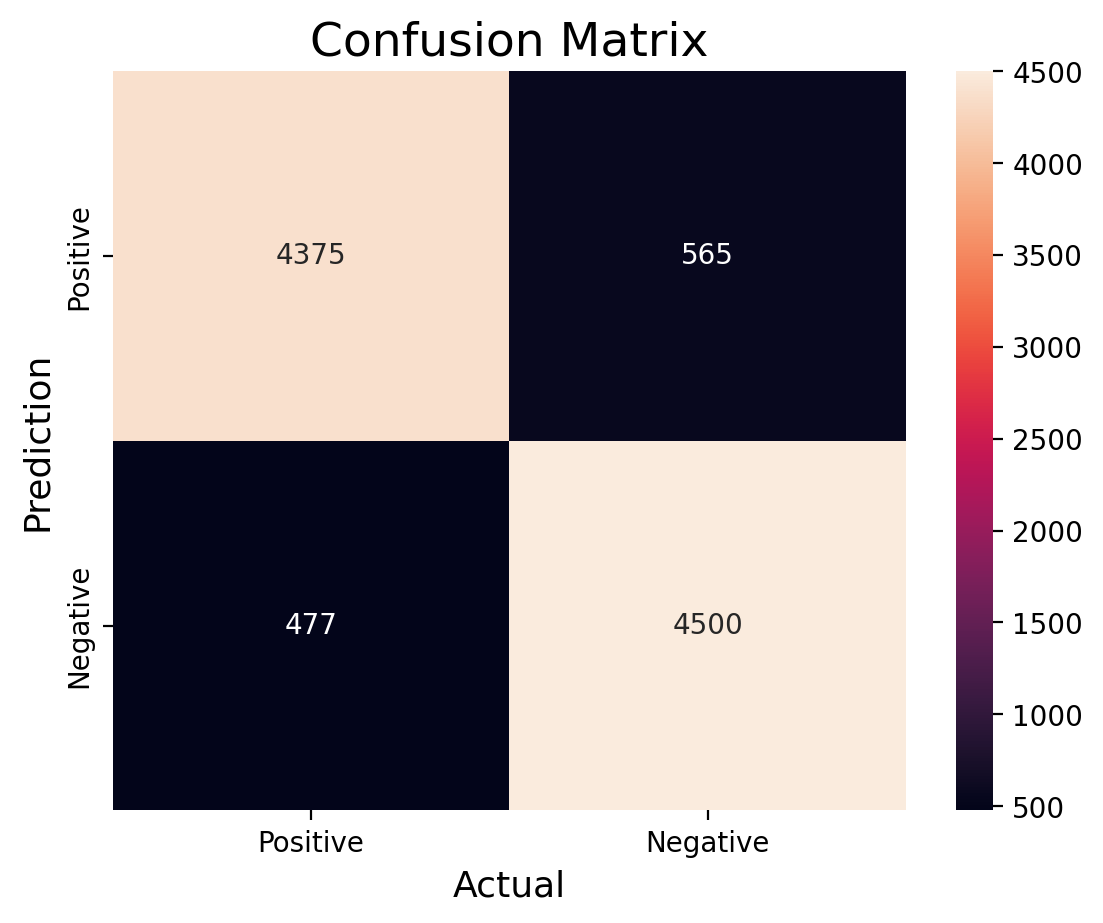

In [ ]:
# Create a heatmap to visualize the confusion matrix
sns.heatmap(cm, # Use the previously computed confusion matrix
            annot=True, # Display numerical values inside the heatmap
            fmt='g',  # Format the numbers as integers
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

## Key Takeaways

---

### **Correct** Predictions (True Positives & True Negatives)


*   4,375 positive reviews were correctly classified as positive.
*   4,500 negative reviews were correctly classified as negative.




### **Misclassifications** (False Positives & False Negatives)


*   565 positive reviews were incorrectly classified as negative (False Negatives).
*  477 negative reviews were incorrectly classified as positive (False Positives).

---


### Overall the LinearSVC model was able to get 89.49% accuracy on the test dataset. Since this is our best model we will be doing some hyperparameter tuning next


# Hyperparameter Tuning

Now let us use some hyperparameter tuning techniques to see whether we can further improve the accuracy score of the LinearSVC model

In this project we will be employing two techniques


*   Bayesian Optimization
  * Bayesian Optimization is a probabilistic model based technique used to find the minimum of any given function. It takes into account past evaluation when choosing the optimal set of hyperparameters and requires less number of evaluations to get to the most optimal hyperparameters
  * However it has a drawback as additional time is required to determine the next hyperparameter to use thus needing more time for each iterations
*   Random Search (Cross Validation)
  * It  randomly samples the hyperparamter combinations instead of testing all the possible values like GridSearch. It requires less computation and run time since it performs fewer trials in the tuning.
  * However since it tests the hyperparameters at random, It runs the risk of missing the ideal set of hyperparameter risking maximum model performance
  



In [ ]:
# Retrieve the hyperparameters of the trained LinearSVC model
svc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': 'auto',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

## Bayesian Optimization

In [ ]:
# In order to improve model performance, we will use the Hyperopt library, which is a hyperparameter optimization library designed for Bayesian Optimization and helps in finding the best hyperparameters efficiently


# Define the hyperparameter search space for LinearSVC
svc_params = {
    'C': hp.loguniform('C', np.log(1e-2), np.log(10)), # Regularization parameter (log-uniform scale)
    'tol': hp.loguniform('tol', np.log(1e-5), np.log(1e-2)), # Tolerance for stopping criteria (log-uniform scale)
    'max_iter': scope.int(hp.quniform('max_iter', 50, 500, 20)), # Maximum number of iterations (quantized uniform)
    'fit_intercept': hp.choice('fit_intercept', [True, False]), # Whether to fit the intercept
    'class_weight': hp.choice('class_weight', [None, 'balanced']) # Class weighting strategy
}


# Define the Bayesian optimization function
def bayes_tuning(estimator,space,max_it,cv):

  #Define objective function
    def obj_function(params):
        model = Pipeline([
            ('preprocessor', preprocessor),
            ('clf', estimator(**params))
        ])

        # Perform cross-validation and compute mean accuracy score
        score = cross_val_score(estimator = model, X= X_train , y = y_train,
                                scoring = 'accuracy',
                                cv = cv,
                               n_jobs=-1).mean()
        return {'loss': -score, 'status': STATUS_OK} # Minimize negative accuracy

    start = time.time() # Start time for tracking execution duration
    hist = Trials() # Track optimization history

     # Perform Bayesian optimization using Tree-structured Parzen Estimator (TPE)
    param = fmin(fn = obj_function,
                  space = space, # Hyperparameter search space
                  algo = tpe.suggest, # Using the Bayesian Optimization Algo
                  max_evals = max_it,
                  trials = hist,
                  rstate=np.random.default_rng(42))

    # Convert the best parameters found back to their original values
    param = space_eval(space, param)

    #Compute best score using the optimal parameters
    score = -obj_function(param)['loss']

    return param, score, hist, time.time() - start


# Define the list of models and their corresponding hyperparameter spaces
models = [LinearSVC]
model_params = [svc_params]

# Lists to store results from Bayesian optimization
bayes_score, bayes_time, bayes_hist,bayes_params = [], [], [],[]

# Iterate over models and perform Bayesian optimization
for m, par in tqdm(zip(models, model_params),leave=False):
    best_params, best_score, trials, duration = bayes_tuning(m, par, max_it=50, cv=5)
    bayes_score.append(best_score)
    bayes_time.append(duration)
    bayes_hist.append(trials)
    bayes_params.append(best_params)

# Create a DataFrame to summarize the results of Bayesian tuning
df_bayes = pd.DataFrame({
    'Model': [m.__name__ for m in models],
    'CV Accuracy': bayes_score,
    'Time': bayes_time,
    'Best Params': bayes_params
})

0it [00:00, ?it/s]


100%|██████████| 50/50 [24:03<00:00, 28.87s/trial, best loss: -0.894919954619942]


In [ ]:
print("Cross-Validation Results with Bayes Optimization:")

# Display the DataFrame containing the best parameters and performance metrics
df_bayes

Cross-Validation Results with Bayes Optimization:


Model  CV Accuracy        Time  \
0  LinearSVC     0.894895  1476.72835   

                                         Best Params  
0  {'C': 0.3174388512038838, 'class_weight': None...

In [ ]:
# Display the best hyperparameters found for the model
df_bayes['Best Params'].values

array([{'C': 0.3174388512038838, 'class_weight': None, 'fit_intercept': True, 'max_iter': 340, 'tol': 4.1790754585018545e-05}],
      dtype=object)

In [ ]:
# Initialize the Linear Support Vector Classifier (SVC) with optimized hyperparameters
svc = LinearSVC(random_state=42,C=0.30505182572936596,class_weight='balanced',fit_intercept=True,max_iter=60,tol=2.811578484567053e-05)

# Create a pipeline that includes preprocessing and the optimized SVC model
tuned_svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', svc)
])

# Train the pipeline using the training dataset
tuned_svc_pipeline.fit(X_train, y_train)

# Make predictions on the test dataset
svc_pred = tuned_svc_pipeline.predict(X_test)

# Calculate the accuracy of the optimized model on the test dataset
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.92%


The LinearSVC after tuned by the Bayesian Optimization technique achieved a

| Tuning Method | CV Accuracy| Test Accuracy|
| ----------- | ----------- |----------- |
 Bayesian  Optimization | 89.5% | 89.9%

Lets do Random Search CV next

## Random Search Cross Validation (CV)

In [ ]:
# Ensure the 'preprocessor' variable is defined before running the pipeline.
# Define the models as a dictionary with model names as keys and instantiated model objects as values.
models = {
    'LinearSVC': LinearSVC(),
}

# Define hyperparameter search space for RandomizedSearchCV
random_params = {
    'LinearSVC': {
        'clf__C': np.linspace(0.01, 10, 10),
        'clf__tol': np.logspace(-5, -2, 5),
        'clf__max_iter': np.arange(50, 501, 20),
        'clf__fit_intercept': [True, False],
        'clf__class_weight': [None, 'balanced']
    }
}

# Initialize a list to store results from the Randomized Search
random_search_results = []

# Iterate over each model in the dictionary
for name, model in models.items():
    # Create a pipeline that includes preprocessing and the classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Ensure preprocessor is defined
        ('clf', model)  # Use instantiated model
    ])

    print(f"Running Random Search for {name}...")
    start_time = time.time() # Record the start time for tracking execution duration

    # Perform Randomized Search with cross-validation (5-fold)
    random_search = RandomizedSearchCV(
        pipeline, param_distributions=random_params[name], cv=5, scoring='accuracy',
        n_iter=30, n_jobs=-1, random_state=42
    )

    # Fit Randomized Search on the training data
    random_search.fit(X_train, y_train)

    # Calculate the total time taken for hyperparameter tuning
    random_time = time.time() - start_time

    # Retrieve the best hyperparameters found
    best_params = random_search.best_params_

    # Retrieve the best cross-validation accuracy score
    best_score = random_search.best_score_

    # Store the results in a list
    random_search_results.append({
        'Model': name,
        'CV Accuracy': best_score,
        'Time Taken (s)': random_time,
        'Best Params': best_params
    })

# Convert results to DataFrame
random_search_df = pd.DataFrame(random_search_results)



Running Random Search for LinearSVC...


In [ ]:
# Display the DataFrame
print("Cross-Validation Results with Random Search:")
random_search_df

Cross-Validation Results with Random Search:


Model  CV Accuracy  Time Taken (s)  \
0  LinearSVC     0.891466      806.768304   

                                         Best Params  
0  {'clf__tol': 5.623413251903491e-05, 'clf__max_...

In [ ]:
# Best Params for Random Search
random_search_df['Best Params'].values

array([{'clf__tol': 5.623413251903491e-05, 'clf__max_iter': 70, 'clf__fit_intercept': True, 'clf__class_weight': None, 'clf__C': 1.12}],
      dtype=object)

In [ ]:
# Initialize the Linear Support Vector Classifier (SVC) with best parameters found from Random Search
svc = LinearSVC(random_state=42,C=1.12,class_weight=None,fit_intercept=True,max_iter=70,tol=5.623413251903491e-05)

# Create a pipeline that includes preprocessing and the optimized SVC model
tuned_svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', svc)
])

# Train the optimized model using the training dataset
tuned_svc_pipeline.fit(X_train, y_train)

# Make predictions on the test dataset
svc_pred = tuned_svc_pipeline.predict(X_test)


# Compute accuracy of the optimized model on the test dataset
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy (After Random Search): {:.2f}%".format(svc_acc*100))

Test accuracy (After Random Search): 89.43%


Random Search CV achieved

| Tuning Method | CV Accuracy| Test Accuracy|
| ----------- | ----------- |----------- |
| Random Search Cross-Validation| 89.1% | 89.4%

Lets compare and conclude the performance of the 2 tuning techniques next

# Hyperparameter Tuning Conclusion
---

| Tuning Method | CV Accuracy| Test Accuracy|
| ----------- | ----------- |----------- |
| Bayesian  Optimization | 89.5% | 89.9%
| Random Search Cross-Validation| 89.1% | 89.4%
| Baseline Model (W/O Tuning)| 89.3% | 89.5%



<br>
<br>
After training the model using both **Bayesian Optimization** and **Random Search Cross-Validation (CV)**, we observed that the **Bayesian Optimization** achieved the highest test accuracy as well as the best CV accuracy.

Compared to the Random Search (Cross-Validation), which resulted in a slightly lower accuracy than the baseline model, this indicates that the hyperparameter selection did not significantly  improve the generalization.

One reason for this is that Random Search CV is less efficient compared to Bayesian Optimization due to the way each method handles hyperparameter tuning:

1.   Random Search CV (Samples the hyperparameters randomly)
2.   Bayesian Optimization (Builds a probabilistic model and refines its search, making it more efficient)



---



Based on our findings, Bayesian Optimization is a more effective tuning method, increasing our test accuracy from the baseline model by 0.4%. This also suggests that Bayesian Optimization is a better hyperparameter tuning approach than Random Search CV in this scenario.




In [ ]:
# Let's save the Bayes-optimized Linear SVC model in a pickle file for future use
import pickle

# Save the trained model pipeline as a .pkl file
with open('/content/drive/MyDrive/ML_Project/bayes_optimized_linearSVC.pkl','wb') as f:
    pickle.dump(random_search_svc_pipeline,f)

In [ ]:
# Compute the confusion matrix for the Bayes-optimized model's predictions
bayes_cm = confusion_matrix(y_test, bayes_svc_pred)
print(bayes_cm)
print("\n")
print(classification_report(y_test, bayes_svc_pred))

[[4394  546]
 [ 454 4523]]


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4940
           1       0.89      0.91      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917



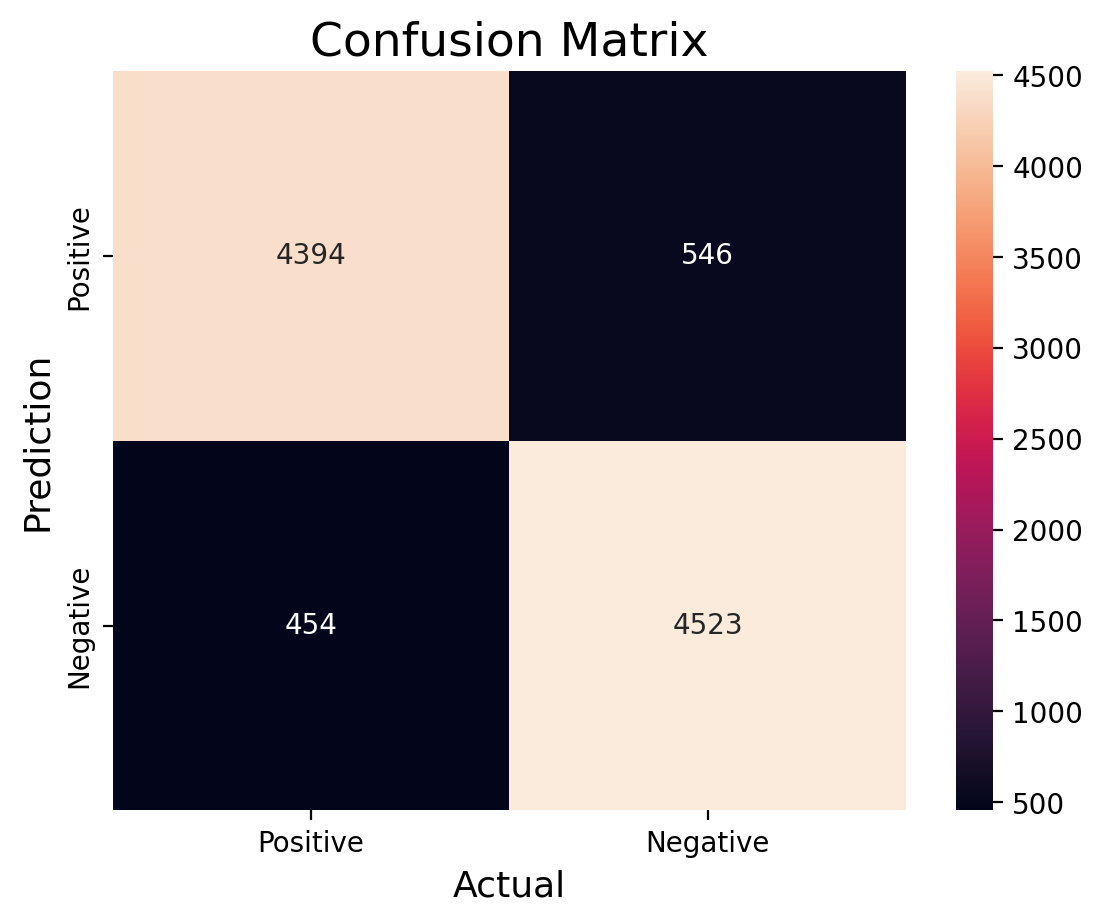

In [ ]:
# Create a heatmap to visualize the confusion matrix
sns.heatmap(bayes_cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negative'],
            yticklabels=['Positive','Negative'])

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### **Key Takeaways**:






---


### **Correct** Predictions (True Positives & True Negatives)


*   4,394 positive reviews were correctly classified as positive.
*   4,523 negative reviews were correctly classified as negative.




### **Misclassifications** (False Positives & False Negatives)


*   546 positive reviews were incorrectly classified as negative (False Negatives).
*  454 negative reviews were incorrectly classified as positive (False Positives).


---


### **Analysis**

This confusion matrix shows a higher amount of True positives and True negative compared to the orignal model, demonstrating that the model can effectively differentiate between sentiment classes.

Some error remain, but a slight misclassification rate is expected in real-world scenarios.

# Testing using Custom Reviews

Let us test the best model that we have trained:


*   **Linear SVC (With Bayes Optimization)**

using our own custom reviews

In [9]:
# Load the pickle file
with open('/content/drive/MyDrive/ML_Project/bayes_optimized_linearSVC.pkl', "rb") as f:
    loaded_data = pickle.load(f)

print("Loaded data:", loaded_data)

Loaded data: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'review'),
                                                 ('num', StandardScaler(),
                                                  ['polarity', 'question_count',
                                                   'negation_count'])])),
                ('clf',
                 LinearSVC(C=0.30505182572936596, class_weight='balanced',
                           max_iter=60, random_state=42,
                           tol=2.811578484567053e-05))])


In [10]:
# Print the contents of the loaded pickle file
loaded_data

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'review'),
                                                 ('num', StandardScaler(),
                                                  ['polarity', 'question_count',
                                                   'negation_count'])])),
                ('clf',
                 LinearSVC(C=0.30505182572936596, class_weight='balanced',
                           max_iter=60, random_state=42,
                           tol=2.811578484567053e-05))])

In [ ]:
# # Before loading if you are running a new notebook without saved variables
# # Count the number of question marks
# def question_count(text):
#     return text.count('?')

# # Count the number of negation words in a text
# def negation_count(text):
#     # List of common negation words and contractions
#     negations = {
#     "not", "never", "no", "none", "nothing", "nowhere", "neither", "nor", "hardly", "scarcely", "barely",
#     "n't", "cannot", "can't", "won't", "don't", "isn't", "wasn't", "aren't", "weren't",
#     "hasn't", "haven't", "hadn't", "doesn't", "didn't", "shouldn't", "wouldn't",
#     "couldn't", "mustn't", "mightn't", "shan't", "ain't", "without", "lacking", "fail to", "unable to"
#     }
#     words = word_tokenize(text.lower()) # Tokenize and convert to lowercase
#     return sum(1 for word in words if word in negations) # Count negation words


# def get_polarity(text):
#     return TextBlob(text).sentiment.polarity  # Extract sentiment polarity using TextBlob


# def clean_text(content):
#     # Expand contractions like "don't" -> "do not"
#     content = contractions.fix(content)

#     # Remove HTML tags (handles full tags like <br> and broken tags like < br >)
#     content = re.sub(r'<.*?>', ' ', content)

#     # Lowercase everything
#     content = content.lower()

#     # Remove numbers
#     content = re.sub(r'\d+', '', content)

#     # Remove all punctuation (including weird symbols)
#     content = re.sub(r'[^\w\s]', ' ', content)

#     # Remove extra spaces (caused by all that cleaning)
#     content = re.sub(r'\s+', ' ', content).strip()

#     # Load stopwords and add custom stopwords like 'br'
#     stop_words = set(stopwords.words('english'))
#     custom_stop_words = ['br']  # <br> becomes br after HTML removal
#     stop_words.update(custom_stop_words)

#     # Tokenize and remove stopwords
#     words = word_tokenize(content)
#     filtered_words = [word for word in words if word not in stop_words and len(word) > 1]

#     # Lemmatize (bring words to root form)
#     lemmatizer = WordNetLemmatizer()
#     lemmatized_words = []
#     for word, tag in pos_tag(filtered_words):
#         pos = tag[0].lower() if tag[0].lower() in ['a', 'n', 'v', 'r'] else 'n'
#         lemmatized_words.append(lemmatizer.lemmatize(word, pos))

#     # Join back into one string
#     content = ' '.join(lemmatized_words)

#     return content

In [11]:
# We will visualize the sentiment analysis using Gradio for a visual user-friendly interface
import gradio as gr
from textblob import TextBlob

# Define function for sentiment analysis
def analyze_sentiment(review):

    # Extract important features that were used during model training
    q_count = question_count(review)
    n_count = negation_count(review)

    # Clean the input text since the model was trained on cleaned data
    review = clean_text(review)
    polarity = get_polarity(review)

    # Create a new DataFrame with the extracted features to match the training format
    new_input = pd.DataFrame({
        'review': [review],
        'polarity': [polarity],
        'question_count': [q_count],
        'negation_count': [n_count]
    })

    # Make a prediction using the pre-trained sentiment analysis model
    prediction = loaded_data.predict(new_input)

    # Convert prediction output into human-readable sentiment labels
    sentiment = "Positive 😊" if prediction[0] == 1 else "Negative 😡"
    return f"Sentiment: {sentiment})"

# Create Gradio interface to interact with the sentiment analysis model
iface = gr.Interface(
    fn=analyze_sentiment,
    inputs="text",
    outputs="text",
    title="Movie Review Sentiment Analyzer",
    description="Enter a movie review and get sentiment analysis results."
)

# Launch the Gradio interface in a browser or as a web app
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://277ac860cbc563f4c4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



#Additional Insights
---

We also wanted to find out whether we are able to extract any emotion from the reviews itself since from our research polarity and subjectivity which might be closely related to emotions.

We used an unsupervised model called Gaussian Mixture Model which is a soft clustering technique which can effectively handle the overlapping, multi-modal distribution of emotional cues within a probabilistic framework


AIC Scores [np.float64(281420.94302616204), np.float64(275659.266638787), np.float64(273695.21596559946), np.float64(273100.9356374717), np.float64(272984.89414981223), np.float64(272924.0084115249), np.float64(272970.04889315565), np.float64(272888.21591578104), np.float64(272941.1452778512), np.float64(272933.467095651)]
BIC Scores [np.float64(281464.9999418802), np.float64(275756.19185336685), np.float64(273845.00947904104), np.float64(273303.59744977497), np.float64(273240.42426097725), np.float64(273232.4068215516), np.float64(273331.31560204417), np.float64(273302.3509235313), np.float64(273408.14858446317), np.float64(273453.3387011247)]


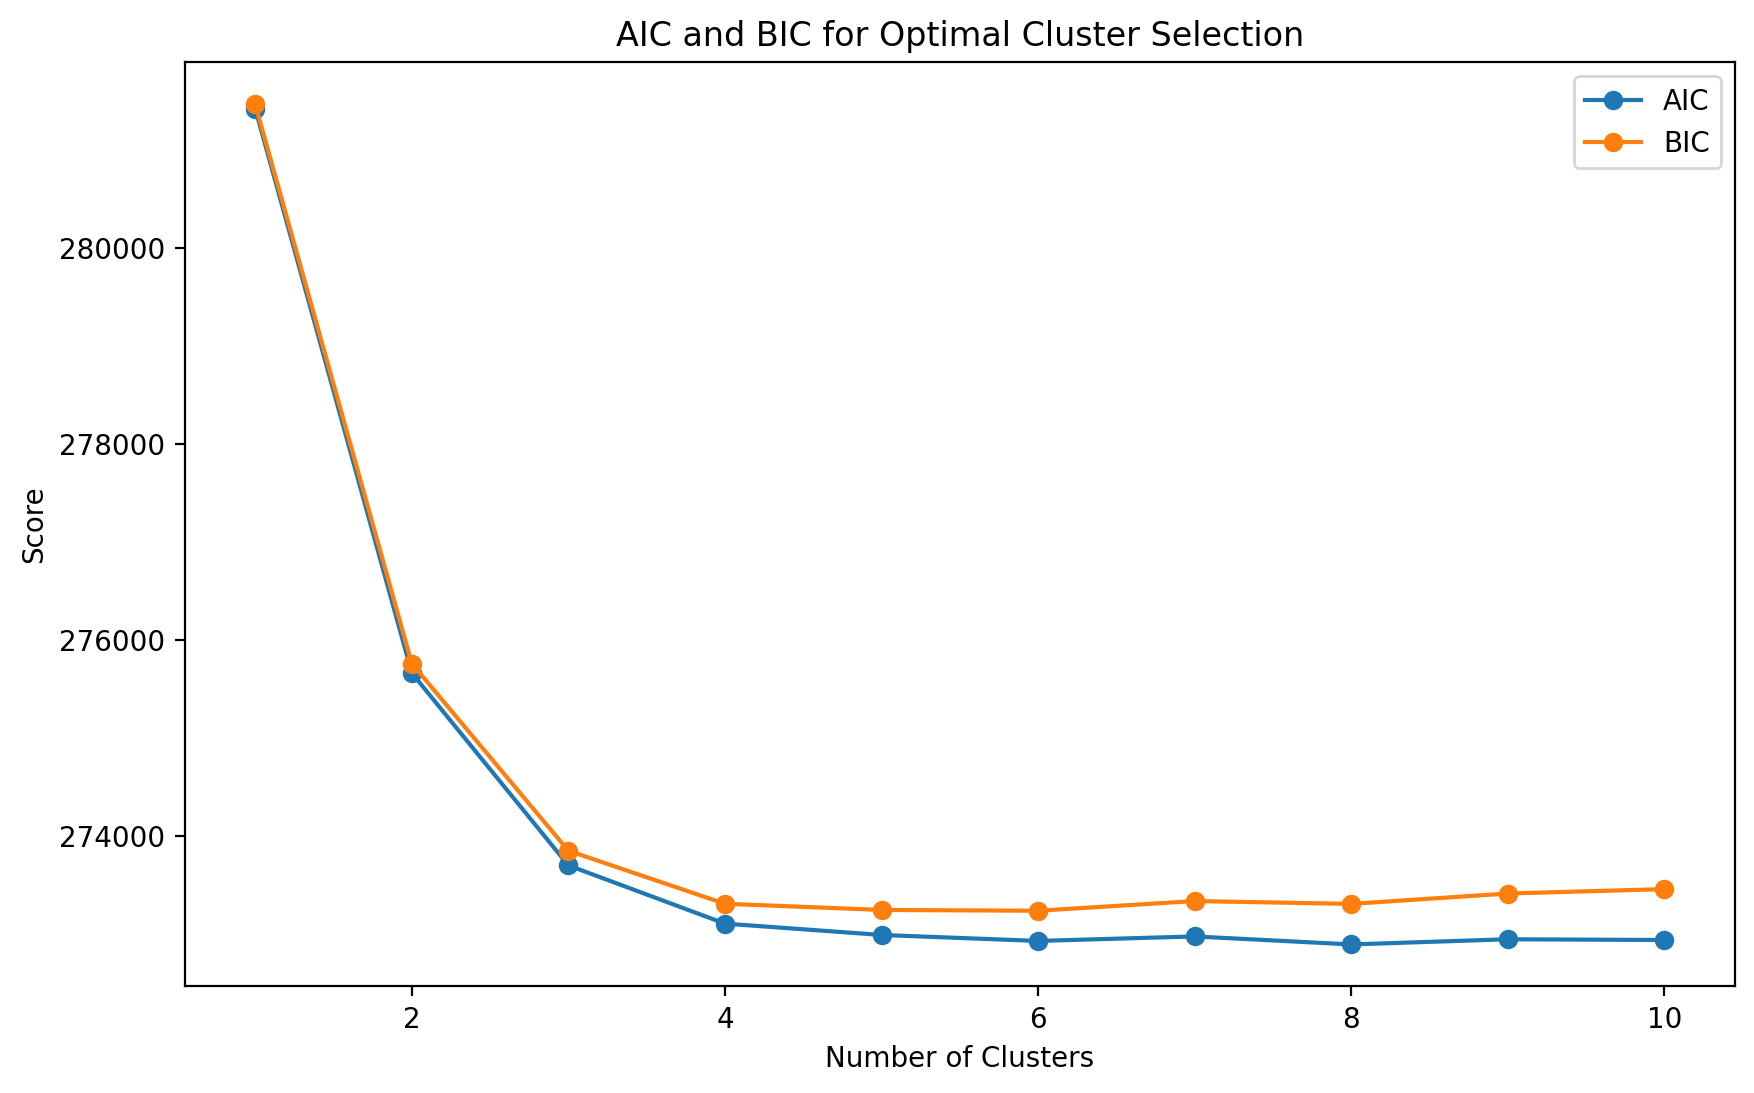

In [ ]:
# Import necessary libraries
from sklearn.mixture import GaussianMixture


# Import the dataset

moviereviews = pd.read_csv('/content/drive/MyDrive/ML_Project/final_data.csv')
# Step 1: Select Features
# We are selecting 'polarity' (sentiment strength) and 'subjectivity' (opinion strength)
# as features for clustering.
features = moviereviews[['polarity', 'subjectivity']]

# Step 2: Standardize the Features
# Standardizing ensures that both features have a mean of 0 and a standard deviation of 1,
# preventing any one feature from dominating due to scale differences.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Define Function to Find Optimal Clusters using AIC and BIC
def find_optimal_clusters(X, max_clusters=10):

    # Lists to store AIC and BIC scores for different cluster sizes
    aic_scores = []
    bic_scores = []
    cluster_range = range(1, max_clusters + 1)  # Testing cluster numbers from 1 to max_clusters

    # Step 4: Train Gaussian Mixture Models with Different Cluster Numbers
    for n in cluster_range:
        gmm = GaussianMixture(n_components=n, random_state=42)  # Initialize GMM with n clusters
        gmm.fit(X)  # Fit the model to the standardized data
        aic_scores.append(gmm.aic(X))  # Compute AIC score and store it
        bic_scores.append(gmm.bic(X))  # Compute BIC score and store it

    # Step 5: Plot AIC and BIC Scores
    plt.figure(figsize=(10, 6))
    print("AIC Scores", aic_scores)  # Print AIC values for reference
    print("BIC Scores", bic_scores)  # Print BIC values for reference
    plt.plot(cluster_range, aic_scores, marker='o', label='AIC')  # Plot AIC scores
    plt.plot(cluster_range, bic_scores, marker='o', label='BIC')  # Plot BIC scores
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('AIC and BIC for Optimal Cluster Selection')
    plt.legend()
    plt.show()

# Step 6: Execute Function to Find Optimal Clusters
find_optimal_clusters(scaled_features)


The chart compares AIC and BIC scores for different cluster numbers, showing a sharp decrease from 1 to around 4 clusters, indicating improved model fit. The scores stabilize between 4 and 6 clusters, suggesting an optimal range before a slight increase beyond 6, which signals potential overfitting. BIC, which penalizes complexity more, favors around 4 clusters, while AIC allows for slight flexibility, suggesting 5-6 clusters. Overall, the best cluster count is likely between 4 and 6, balancing model performance and complexity.

##Clustering of Movie Reviews Based on Sentiment Intensity and Subjectivity Using GMM

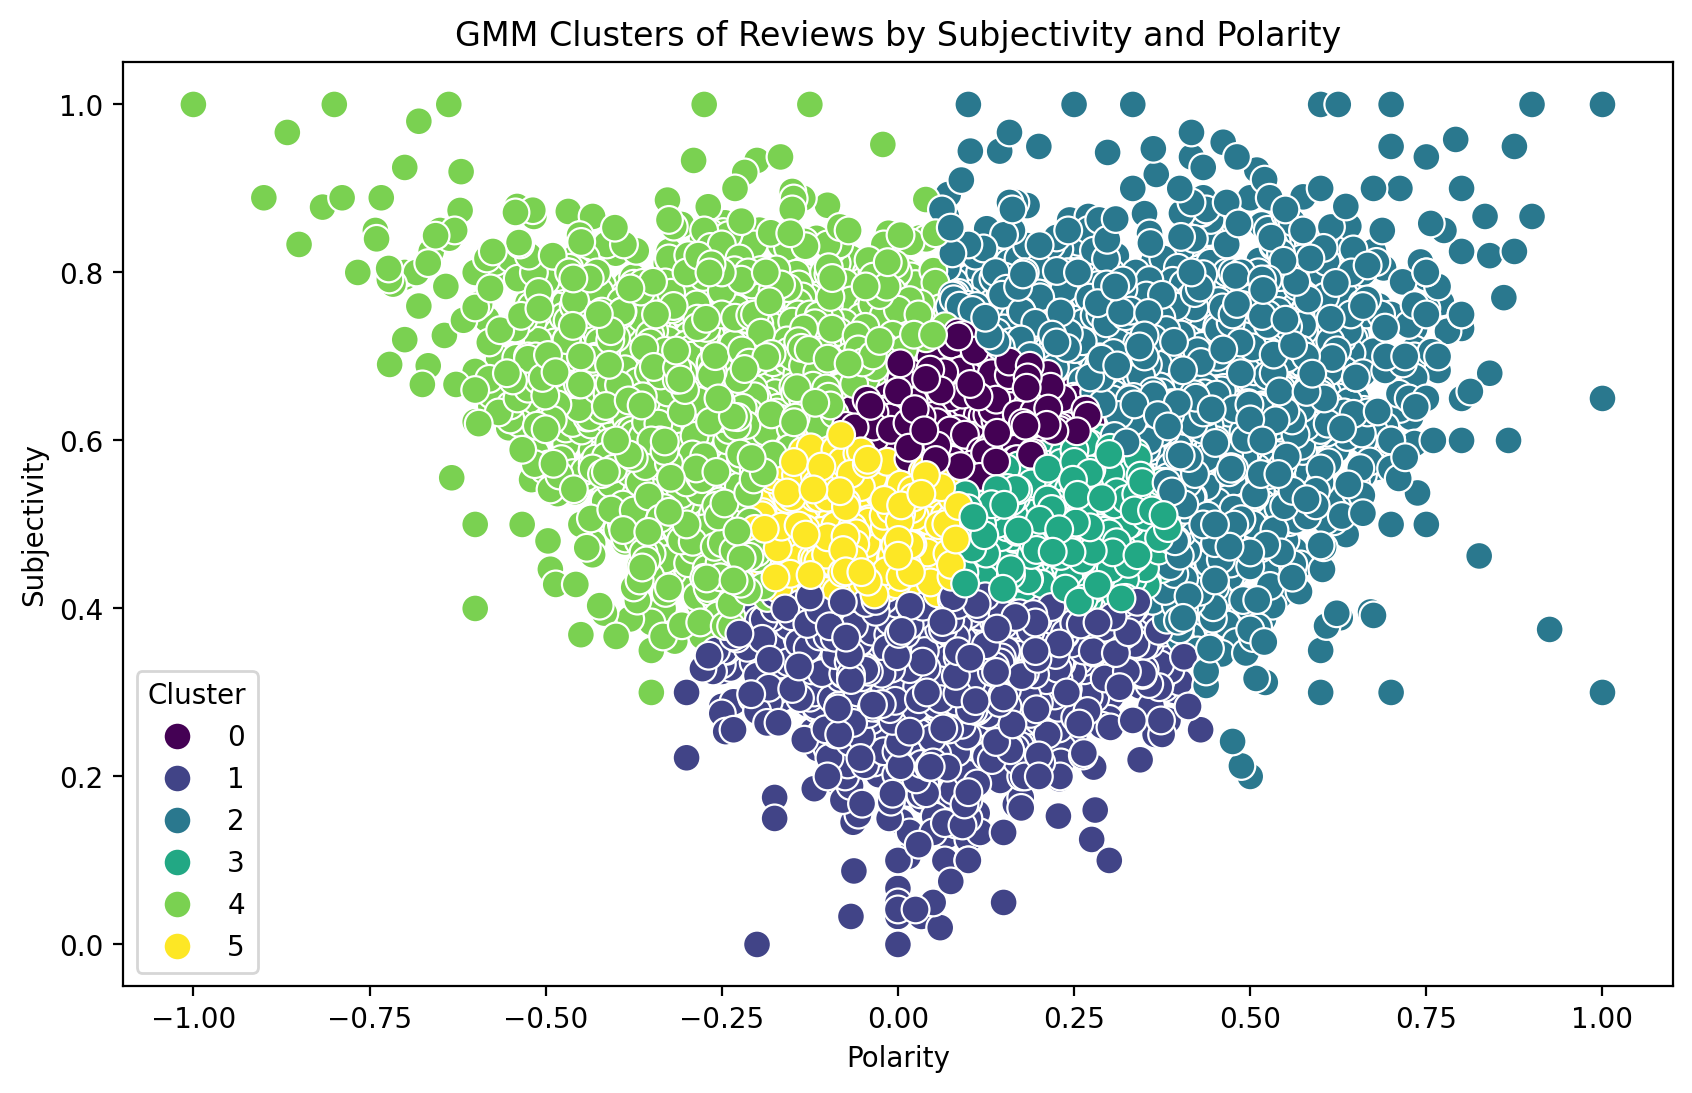

                                              review  subjectivity  polarity  \
0  one reviewer mention watch oz episode hook rig...      0.478381  0.040548   
1  wonderful little production film technique una...      0.546078  0.125980   
2  think wonderful way spend time hot summer week...      0.631122  0.356122   
3  basically family little boy jake think zombie ...      0.535417  0.032812   
4  petter mattei love time money visually stunnin...      0.418848  0.238697   

     emotion  
0  Criticism  
1  Agreement  
2   Euphoria  
3  Criticism  
4  Agreement  


In [ ]:
# Fit GMM with the optimal number of clusters (k=6)
gmm = GaussianMixture(n_components=6, random_state=42)
clusters = gmm.fit_predict(scaled_features)

# Add the cluster labels to your dataframe
moviereviews['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=moviereviews['polarity'], y=moviereviews['subjectivity'], hue=moviereviews['cluster'], palette='viridis', s=100)
plt.title('GMM Clusters of Reviews by Subjectivity and Polarity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.legend(title='Cluster')
plt.show()

# Label the clusters manually based on their characteristics
# Get the GMM cluster centers (mean of each component)
cluster_centers = gmm.means_

def assign_emotion(cluster_center):
    polarity = cluster_center[0]
    subjectivity = cluster_center[1]

    # For high subjectivity reviews (more emotional expression)
    if subjectivity > 0.6:
        if polarity > 0.7:
            return 'Euphoria'  # Extremely positive and highly subjective
        elif polarity > 0.5:
            return 'Joy'  # Strong positive, highly subjective
        elif polarity > 0.2:
            return 'Excitement'  # Moderate positive, highly subjective
        elif polarity < -0.7:
            return 'Rage'  # Extremely negative and highly subjective
        elif polarity < -0.5:
            return 'Anger'  # Strong negative, highly subjective
        elif polarity < -0.2:
            return 'Sadness'  # Moderate negative, highly subjective
        else:
            return 'Surprise'  # Near neutral, highly subjective

    # For medium subjectivity reviews (moderate emotional expression)
    elif subjectivity > 0.3:
        if polarity > 0.5:
            return 'Satisfaction'  # Positive, moderate subjectivity
        elif polarity > 0.2:
            return 'Contentment'  # Slightly positive, moderate subjectivity
        elif polarity < -0.5:
            return 'Frustration'  # Negative, moderate subjectivity
        elif polarity < -0.2:
            return 'Disappointment'  # Slightly negative, moderate subjectivity
        else:
            return 'Ambivalence'  # Mixed feelings, moderate subjectivity

    # For low subjectivity reviews (more factual/objective)
    else:
        if polarity > 0.6:
            return 'Approval'  # Positive, low subjectivity
        elif polarity > 0.3:
            return 'Agreement'  # Mildly positive, low subjectivity
        elif polarity < -0.6:
            return 'Disapproval'  # Negative, low subjectivity
        elif polarity < -0.3:
            return 'Criticism'  # Mildly negative, low subjectivity
        else:
            return 'Neutral'  # Neutral, low subjectivity

# Map the cluster labels to emotions based on the cluster centers
moviereviews['emotion'] = moviereviews['cluster'].apply(lambda x: assign_emotion(cluster_centers[x]))

# Output the final DataFrame with the emotion labels
print(moviereviews[['review', 'subjectivity', 'polarity', 'emotion']].head())

The scatter plot visualizes Gaussian Mixture Model (GMM) clusters of reviews based on subjectivity and polarity, grouping them into distinct clusters represented by different colors. Reviews with high subjectivity and varying polarity are spread across multiple clusters, while more objective reviews (lower subjectivity) are mostly concentrated in fewer clusters. The central region, where polarity is near neutral, has overlapping clusters, indicating diverse sentiment nuances. The clustering suggests that GMM effectively captures sentiment variations, with distinct groupings for strongly positive, strongly negative, and neutral reviews. The model identifies structured sentiment patterns, supporting its use for nuanced sentiment analysis.

##Emotion Distribution in Movie Reviews

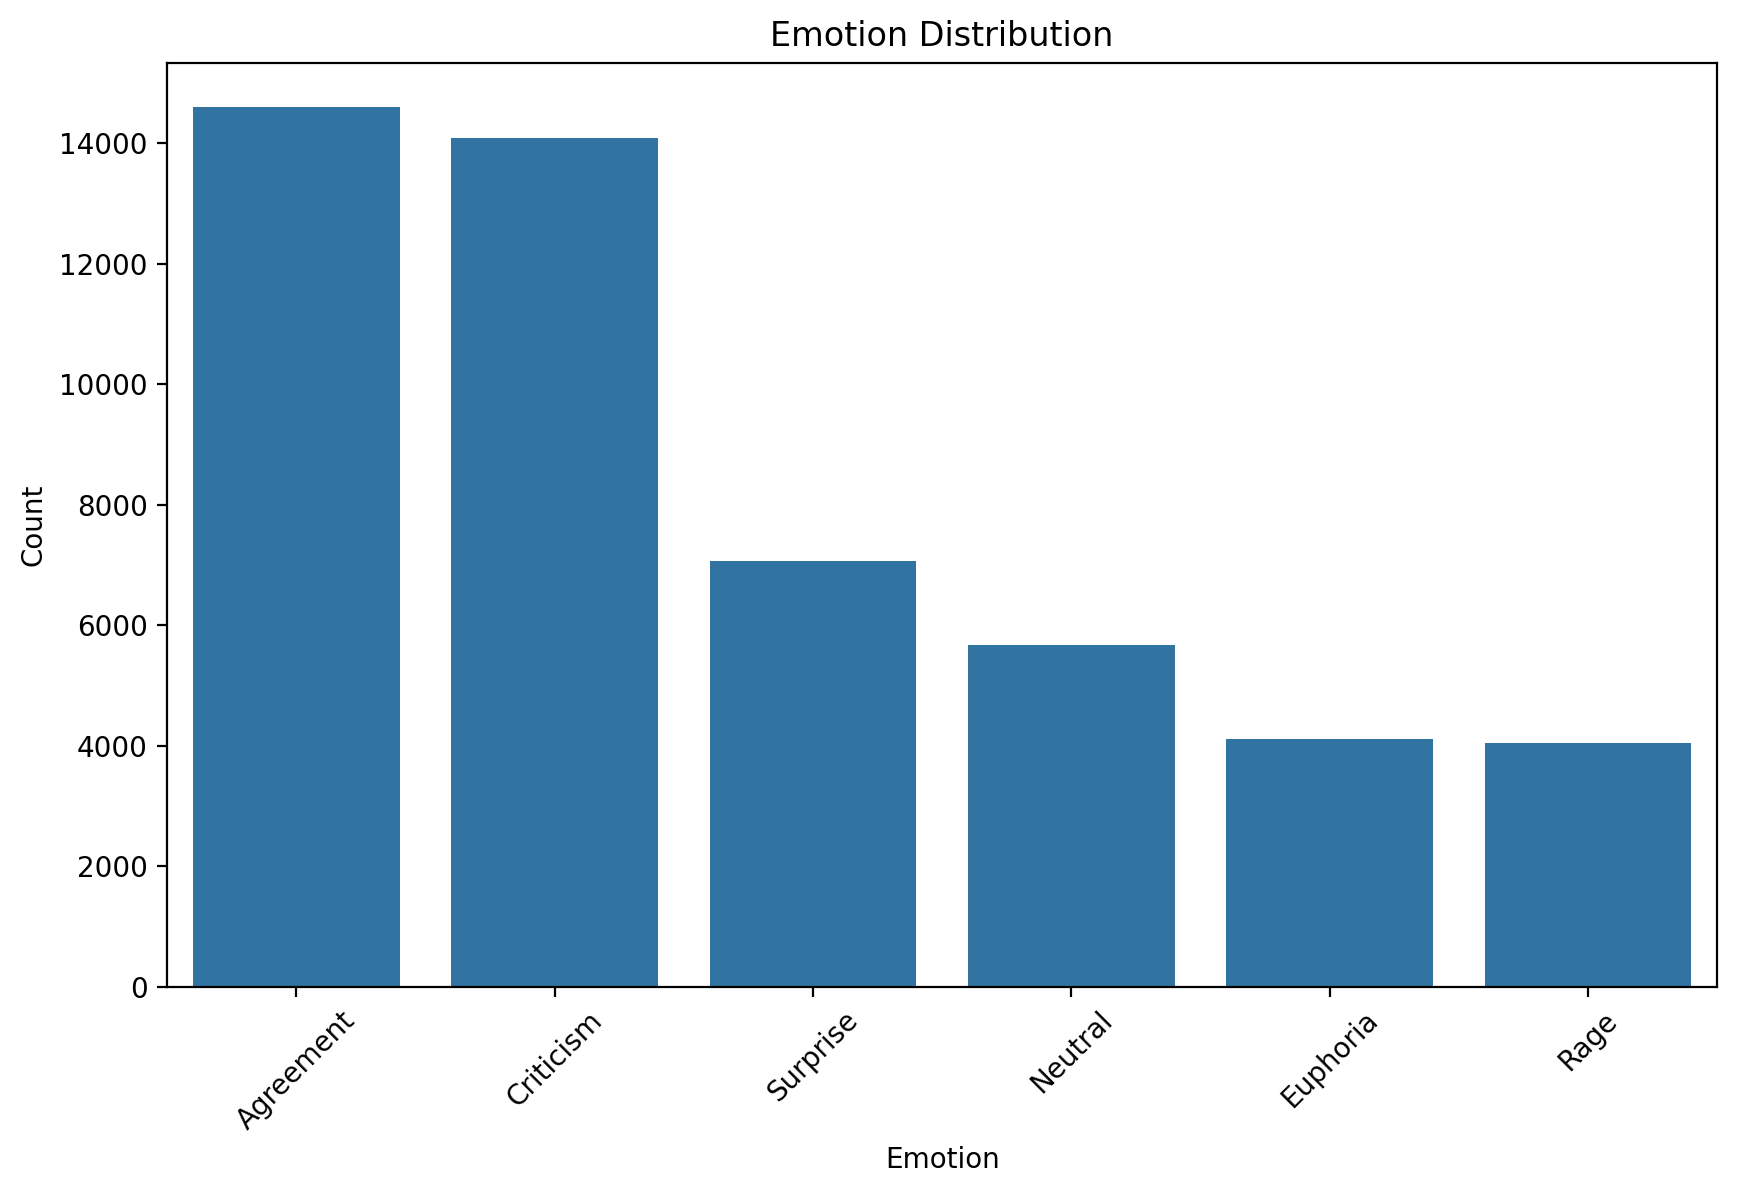

In [ ]:

# Count emotions
df_emotion = moviereviews['emotion'].value_counts().reset_index()
df_emotion.columns = ['Emotion', 'Count']

# Plot emotion distribution
plt.figure(figsize=(10,6))
sns.barplot(x='Emotion', y='Count', data=df_emotion, order=df_emotion['Emotion'])
plt.title('Emotion Distribution')
plt.xticks(rotation=45)
plt.show()

The bar chart shows that most reviews fall into Agreement or Criticism, meaning people tend to either approve or disapprove of what they’re reviewing. Surprise is also quite common, suggesting that many reviews contain unexpected reactions. Neutral opinions are present but not as dominant, indicating that most people lean one way or another rather than staying impartial. Euphoria and Rage are the least frequent, showing that extreme emotional responses—whether overly positive or negative—are rare. This suggests that while the model does a good job capturing different opinions, it might not pick up on strong emotions as often since they appear less in the dataset.











# Conclusion

In conclusion we were able to build a classification model that is able to correctly identified the sentiment of movie reviews and categorises them into postive or negative

By leveraging feature engineering, hyperparameter tuning, and optimization techniques, we improved the model’s performance and achieved strong performance  on unseen data.


Our final accuracy scores are as follows:

| Model Name | CV Accuracy| Test Accuracy|
| ----------- | ----------- |----------- |
| Linear SVC with Bayesian  Optimization | 89.5% | 89.9%

These results demostrate the effectiveness of proper Text Cleaning (NLP),Stratified K-Fold Cross-Validation, TF-IDF for text representation, and Bayesian Optimization for hyperparameter tuning in enhancing sentiment classification performance.

## Possible Improvements
*   Experimenting with Deep Learning Models: Deep Learning models are better suited to finding more complex patterns in the data than classical machine learning techniques which allows for higher accuracy scores

* Fine-Tune Hyperparameters Further: Additional Tuning such as increasing the iterations or adjusting the search params could yield better results

*  Handle Sarcasm and Context Awareness – Sentiment analysis struggles with sarcasm and implicit sentiment. Using a context-aware model like BERT could improve performance in such cases.

